<center>

<font size= "6"> Portfolio Management with few Large CAP NIFTY tocks</font>

<center>


I'm Poulami Nandi, a Data Scientist working with Machine Learning models to build Applications that fetch insight from Data. This work is an attempt to derive different types of portfolio from a few bigger large CAP stocks from NIFTY50 index. This includes:
- Data collection for various stocks from NIFTY50
- Visualization of closing price evolution
- Risk and volatility measurement
- Correlation calculation
- Sharpe Ratio calculation
- Simulation of many possible portfolios with varying weightage of stocks
- Visualization of Portfolios
- Driving the portfolio with the highest return and the portfolio with the lowest volatility
- Insights listed after each derivation     


** Links **

- *** Poulami Nandi ***
- ***E-mail***: nandi.poulami91@gmail.com; pnandi@sas.upenn.edu
- ***LinkedIn***: https://www.linkedin.com/in/poulami-nandi-a8a12917b/
- ***InspireHep***:  https://inspirehep.net/authors/1718068
- **ResearchGate**: https://www.researchgate.net/profile/Poulami-Nandi-2
- ***Google Scholar***: https://scholar.google.co.in/citations?user=bOYJeAYAAAAJ&hl=en

    

# Introduction

This project aims to study the Portfolio Management comprised of six major Large CAP stocks (TCS, INFY, HDFC, ICICI, RIL and ITC) and the NIFTY50 index, all listed on the National Stock Exchange(NSE). This study aims to minimize the risk associated with this portfolio by using portfolio management techniques.

The importance of portfolio management lies in finding a balance between expected return and risk. Volatility, which measures the dispersion of an asset's returns, is often used to measure risk. On the other hand, expected return represents the average expected return on an asset. Analyzing the relationship between volatility and expected return will improve our Performance.

In this context, we will examine different portfolio compositions, adjusting the investment proportions in each asset. The objective is to find the optimal combination that minimises the portfolio's overall risk while maximising the expected return. We will use concepts such as covariance and the correlation coefficient between asset returns to do this. Particular attention will be paid to the effect of correlations between asset returns on the portfolio's risk level. The correlation coefficient reflects the extent to which asset returns move together. We will study how the correlation between the selected stocks and the NIFTY50 index can influence the portfolio's overall risk.

To conduct this study, we will use the Python programming language and Google Colab in particular, which offers a range of tools and libraries for financial analysis and portfolio management. Using Python, we can perform volatility, covariance, and portfolio optimisation calculations to find the optimal composition that minimises risk.

In conclusion, this project will allow us to explore the fundamental concepts of portfolio management by studying the construction of a portfolio composed of Four stocks and a stock index. We will minimise risk using quantitative analysis and optimisation techniques while maximising expected return. Analysing the effect of correlations between asset returns will allow us to understand better the impact of diversification on the portfolio's risk level.

### Import libraries and data

We need to import of the basic library to be able to analyze the data:

In [2]:
!pip install pandas -U
!pip install yfinance
!pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 84.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38617 sha256=0e80a145e87772ebf7a91d62ac8e097302dc53a80ede48cb423ec07bbd381689
  Stored in directory: /root/.cache

In [4]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
from scipy import stats


import math
import seaborn as sns
import datetime as dt
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
from pylab import rcParams
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


First of all, install yahoofinance libraries via pip.

In [5]:
!pip install yfinance
!pip install yahoofinancials

> In this project, we have chosen six major Large CAP stocks (TCS, INFY, HDFC, ICICI, RIL and ITC) and the NIFTY50 index listed on the National  Stock Exchange and one market index (S\&P500).  

You can import any stock from the ``yfinance`` library and choose the period and name as a ticker.

In [120]:
import pandas as pd
from yahoofinancials import YahooFinancials
import yfinance as yf

In [45]:
HDFC = yf.download("HDFCBANK.NS", start="2012-05-18", end="2023-10-01",group_by="ticker") # Stock of HDFC
RIL = yf.download("RELIANCE.NS", start="2012-05-18", end="2023-10-01",group_by="ticker") # Stock of RIL
TCS = yf.download("TCS.NS", start="2012-05-18", end="2023-10-01",group_by="ticker") # Stock of TCS
INFY = yf.download("INFY.NS", start="2012-05-18", end="2023-10-01",group_by="ticker") # Stock of INFY
ICICI = yf.download("ICICIBANK.NS", start="2012-05-18", end="2023-10-01",group_by="ticker") # Stock of ICICI
ITC = yf.download("ITC.NS", start="2012-05-18", end="2023-10-01",group_by="ticker") # Stock of ITC
NIFTY = yf.download("^NSEI", start="2012-05-18", end="2023-10-01",group_by="ticker") # Stock of NIFTY50
print("Shape of stock data: ", HDFC.shape, ICICI.shape, TCS.shape, INFY.shape, RIL.shape, ITC.shape, NIFTY.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Shape of stock data:  (2805, 6) (2805, 6) (2805, 6) (2805, 6) (2805, 6) (2805, 6) (2790, 6)


The stock size is 2805 observations and 7 variables. Visualize the head and tail for each stock:

In [46]:
HDFC

Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-05-18   244.899994   251.949997   244.500000   250.274994   225.888290   
2012-05-21   250.125000   253.925003   246.975006   248.725006   224.489319   
2012-05-22   251.899994   252.500000   243.475006   244.625000   220.788849   
2012-05-23   245.000000   246.449997   241.100006   243.600006   219.863708   
2012-05-24   246.500000   251.350006   242.500000   249.850006   225.504730   
...                 ...          ...          ...          ...          ...   
2023-09-25  1525.000000  1540.699951  1525.000000  1531.000000  1510.375122   
2023-09-26  1525.000000  1540.000000  1525.000000  1537.650024  1516.935547   
2023-09-27  1523.000000  1532.500000  1515.000000  1526.849976  1506.281006   
2023-09-28  1534.000000  1537.599976  1518.349976  1523.699951  1503.173462   
2023-09-29  1523.699951  1535.449951  1522.300049  1526.300049  1505.738525   

              Volume  
Date                  
2012-05-18   4807208  
2012-05-21   4271170  
2012-05-22   5548406  
2012-05-23   6347944  
2012-05-24   5769622  
...              ...  
2023-09-25  20104377  
2023-09-26  13787654  
2023-09-27  19669269  
2023-09-28  27677094  
2023-09-29  16026891  

[2805 rows x 6 columns]

In [47]:
ICICI

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18  140.027283  147.272720  139.699997  146.399994  124.402489   
2012-05-21  144.927277  148.872726  144.927277  147.472733  125.314056   
2012-05-22  149.100006  149.972733  145.163635  145.600006  123.722687   
2012-05-23  144.181824  146.336365  143.672729  144.236359  122.563942   
2012-05-24  145.636368  150.181824  143.963638  149.199997  126.781761   
...                ...         ...         ...         ...         ...   
2023-09-25  950.299988  961.200012  941.500000  956.349976  948.187195   
2023-09-26  958.950012  958.950012  947.099976  948.700012  940.602539   
2023-09-27  946.299988  946.500000  934.400024  943.099976  935.050293   
2023-09-28  945.500000  947.250000  934.750000  942.599976  934.554565   
2023-09-29  946.700012  956.000000  943.700012  951.900024  943.775269   

              Volume  
Date                  
2012-05-18  24381560  
2012-05-21  17162794  
2012-05-22  22998915  
2012-05-23  14613428  
2012-05-24  16923032  
...              ...  
2023-09-25   8997098  
2023-09-26  10521409  
2023-09-27  15152973  
2023-09-28  25991282  
2023-09-29  10447334  

[2805 rows x 6 columns]

In [48]:
TCS

Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-05-18   602.400024   612.450012   601.325012   605.325012   482.921173   
2012-05-21   605.500000   612.500000   602.025024   604.599976   482.342957   
2012-05-22   610.500000   620.000000   606.500000   612.025024   488.266479   
2012-05-23   616.500000   617.775024   607.049988   612.575012   488.705444   
2012-05-24   612.500000   614.474976   603.549988   610.724976   487.229156   
...                 ...          ...          ...          ...          ...   
2023-09-25  3602.500000  3620.000000  3558.649902  3577.149902  3525.814941   
2023-09-26  3567.600098  3594.949951  3536.000000  3585.699951  3534.242432   
2023-09-27  3590.000000  3614.000000  3555.699951  3589.300049  3537.790771   
2023-09-28  3600.000000  3602.800049  3527.350098  3536.750000  3485.994873   
2023-09-29  3537.199951  3568.449951  3505.550049  3528.600098  3477.961914   

             Volume  
Date                 
2012-05-18  2656670  
2012-05-21  2227088  
2012-05-22  2360916  
2012-05-23  2162806  
2012-05-24  1205674  
...             ...  
2023-09-25  1238778  
2023-09-26  1726062  
2023-09-27  1541134  
2023-09-28  1755753  
2023-09-29  2243791  

[2805 rows x 6 columns]

In [49]:
INFY

Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-05-18   290.668762   300.625000   287.768738   297.856262   220.653717   
2012-05-21   298.112488   298.187500   290.500000   292.556244   216.727417   
2012-05-22   294.375000   296.006256   290.456238   292.637512   216.787598   
2012-05-23   294.375000   295.600006   288.399994   293.524994   217.445068   
2012-05-24   293.625000   298.612488   289.125000   297.600006   221.406784   
...                 ...          ...          ...          ...          ...   
2023-09-25  1489.849976  1489.849976  1471.550049  1474.150024  1434.922729   
2023-09-26  1479.150024  1479.900024  1459.000000  1460.650024  1421.781860   
2023-09-27  1456.000000  1469.599976  1450.050049  1467.000000  1427.962891   
2023-09-28  1467.900024  1472.599976  1435.000000  1439.449951  1401.145874   
2023-09-29  1432.099976  1446.800049  1416.000000  1435.449951  1397.252319   

             Volume  
Date                 
2012-05-18  5938160  
2012-05-21  4776760  
2012-05-22  5823208  
2012-05-23  5402032  
2012-05-24  7612048  
...             ...  
2023-09-25  4217863  
2023-09-26  3996528  
2023-09-27  3863586  
2023-09-28  5814602  
2023-09-29  6068968  

[2805 rows x 6 columns]

In [50]:
RIL

Open         High          Low        Close    Adj Close  \
Date                                                                          
2012-05-18   309.455902   318.370636   308.587280   314.781891   285.702362   
2012-05-21   313.844696   320.336456   313.616119   317.959198   288.586182   
2012-05-22   322.119415   322.119415   314.873322   315.947662   286.760468   
2012-05-23   313.250397   315.421936   310.667389   314.004700   284.997009   
2012-05-24   317.273438   320.016449   313.661835   317.867767   288.503204   
...                 ...          ...          ...          ...          ...   
2023-09-25  2350.399902  2360.699951  2335.100098  2340.449951  2332.533447   
2023-09-26  2338.550049  2350.199951  2335.600098  2342.500000  2334.576416   
2023-09-27  2343.500000  2371.800049  2338.500000  2368.899902  2360.887207   
2023-09-28  2383.000000  2383.000000  2325.000000  2334.100098  2326.205078   
2023-09-29  2341.800049  2369.100098  2334.100098  2345.000000  2337.068115   

             Volume  
Date                 
2012-05-18  5170896  
2012-05-21  5105640  
2012-05-22  6426647  
2012-05-23  5650783  
2012-05-24  5249332  
...             ...  
2023-09-25  7127442  
2023-09-26  5043891  
2023-09-27  5861389  
2023-09-28  7259173  
2023-09-29  6171007  

[2805 rows x 6 columns]

In [52]:
ITC

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-05-18  154.833328  160.666672  153.333328  159.699997  112.220154   
2012-05-21  159.766663  160.633331  156.000000  156.566666  110.018394   
2012-05-22  158.199997  159.466660  153.399994  155.166672  109.034615   
2012-05-23  154.033340  155.333328  153.333328  154.466660  108.542732   
2012-05-24  154.466660  156.466660  154.000000  155.566666  109.315689   
...                ...         ...         ...         ...         ...   
2023-09-25  443.100006  444.799988  438.350006  442.600006  428.591858   
2023-09-26  443.600006  444.500000  439.700012  442.450012  428.446594   
2023-09-27  442.450012  449.799988  438.799988  449.149994  434.934509   
2023-09-28  449.950012  449.950012  439.600006  440.750000  426.800385   
2023-09-29  442.000000  445.600006  439.200012  444.399994  430.334869   

              Volume  
Date                  
2012-05-18  12564612  
2012-05-21   6220906  
2012-05-22  10250674  
2012-05-23   6542976  
2012-05-24   8680165  
...              ...  
2023-09-25   5782955  
2023-09-26   5327833  
2023-09-27  10490786  
2023-09-28  10216736  
2023-09-29   8160058  

[2805 rows x 6 columns]

In [53]:
NIFTY

Open          High           Low         Close  \
Date                                                                 
2012-05-18   4796.399902   4908.500000   4788.950195   4891.450195   
2012-05-22   4954.700195   4956.350098   4849.899902   4860.500000   
2012-05-23   4843.000000   4853.750000   4803.950195   4835.649902   
2012-05-24   4863.399902   4931.899902   4830.149902   4921.399902   
2012-05-25   4905.950195   4935.799805   4889.350098   4920.399902   
...                  ...           ...           ...           ...   
2023-09-25  19678.199219  19734.150391  19601.550781  19674.550781   
2023-09-26  19682.800781  19699.349609  19637.449219  19664.699219   
2023-09-27  19637.050781  19730.699219  19554.000000  19716.449219   
2023-09-28  19761.800781  19766.650391  19492.099609  19523.550781   
2023-09-29  19581.199219  19726.250000  19551.050781  19638.300781   

               Adj Close  Volume  
Date                              
2012-05-18   4891.450195       0  
2012-05-22   4860.500000       0  
2012-05-23   4835.649902       0  
2012-05-24   4921.399902       0  
2012-05-25   4920.399902       0  
...                  ...     ...  
2023-09-25  19674.550781  188400  
2023-09-26  19664.699219  204900  
2023-09-27  19716.449219  203600  
2023-09-28  19523.550781  352800  
2023-09-29  19638.300781  243500  

[2790 rows x 6 columns]

# Exploratory Data Analysis (EDA)


Exploratory Data Analysis (EDA) for stocks like RIL, ICICI, HDFC, TCS, ITC and NIFTY50 involves examining their historical price and volume data. Through visualizations, statistical measures, and studying relationships, EDA helps identify trends, patterns, and interdependencies among these stocks. It provides insights into their behaviour, distribution of returns, and market dependencies, assisting in decision-making and further analysis.

## Data Analysis

We start with the descriptive statistics of the variables; Open, High, Low, Close, Adj Close, and Volume for these top NIFTY50 companies:

In [54]:
HDFC.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [55]:
ICICI.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [56]:
TCS.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [57]:
INFY.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [58]:
RIL.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [59]:
ITC.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [60]:
NIFTY.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

> The presence of no missing values in each stock dataset is a positive finding, indicating that we have complete and reliable data for analysis. This allows for accurate assessments of various aspects of the stocks, simplifies data preparation, and ensures more robust and trustworthy studies.

In [62]:
#Combining dataframes
dataset = pd.concat([HDFC.Close, ICICI.Close,TCS.Close,INFY.Close, RIL.Close,ITC.Close, NIFTY.Close],axis=1)
# Change the column names
dataset.columns =['HDFC', 'ICICI', 'TCS','INFY','RIL','ITC', 'NIFTY']
dataset.head()

HDFC       ICICI         TCS        INFY         RIL  \
Date                                                                     
2012-05-18  250.274994  146.399994  605.325012  297.856262  314.781891   
2012-05-21  248.725006  147.472733  604.599976  292.556244  317.959198   
2012-05-22  244.625000  145.600006  612.025024  292.637512  315.947662   
2012-05-23  243.600006  144.236359  612.575012  293.524994  314.004700   
2012-05-24  249.850006  149.199997  610.724976  297.600006  317.867767   

                   ITC        NIFTY  
Date                                 
2012-05-18  159.699997  4891.450195  
2012-05-21  156.566666          NaN  
2012-05-22  155.166672  4860.500000  
2012-05-23  154.466660  4835.649902  
2012-05-24  155.566666  4921.399902

In [63]:
print('Shape of data',dataset.shape)

Shape of data (2805, 7)


We have 2806 observations (day) and 7 variables.

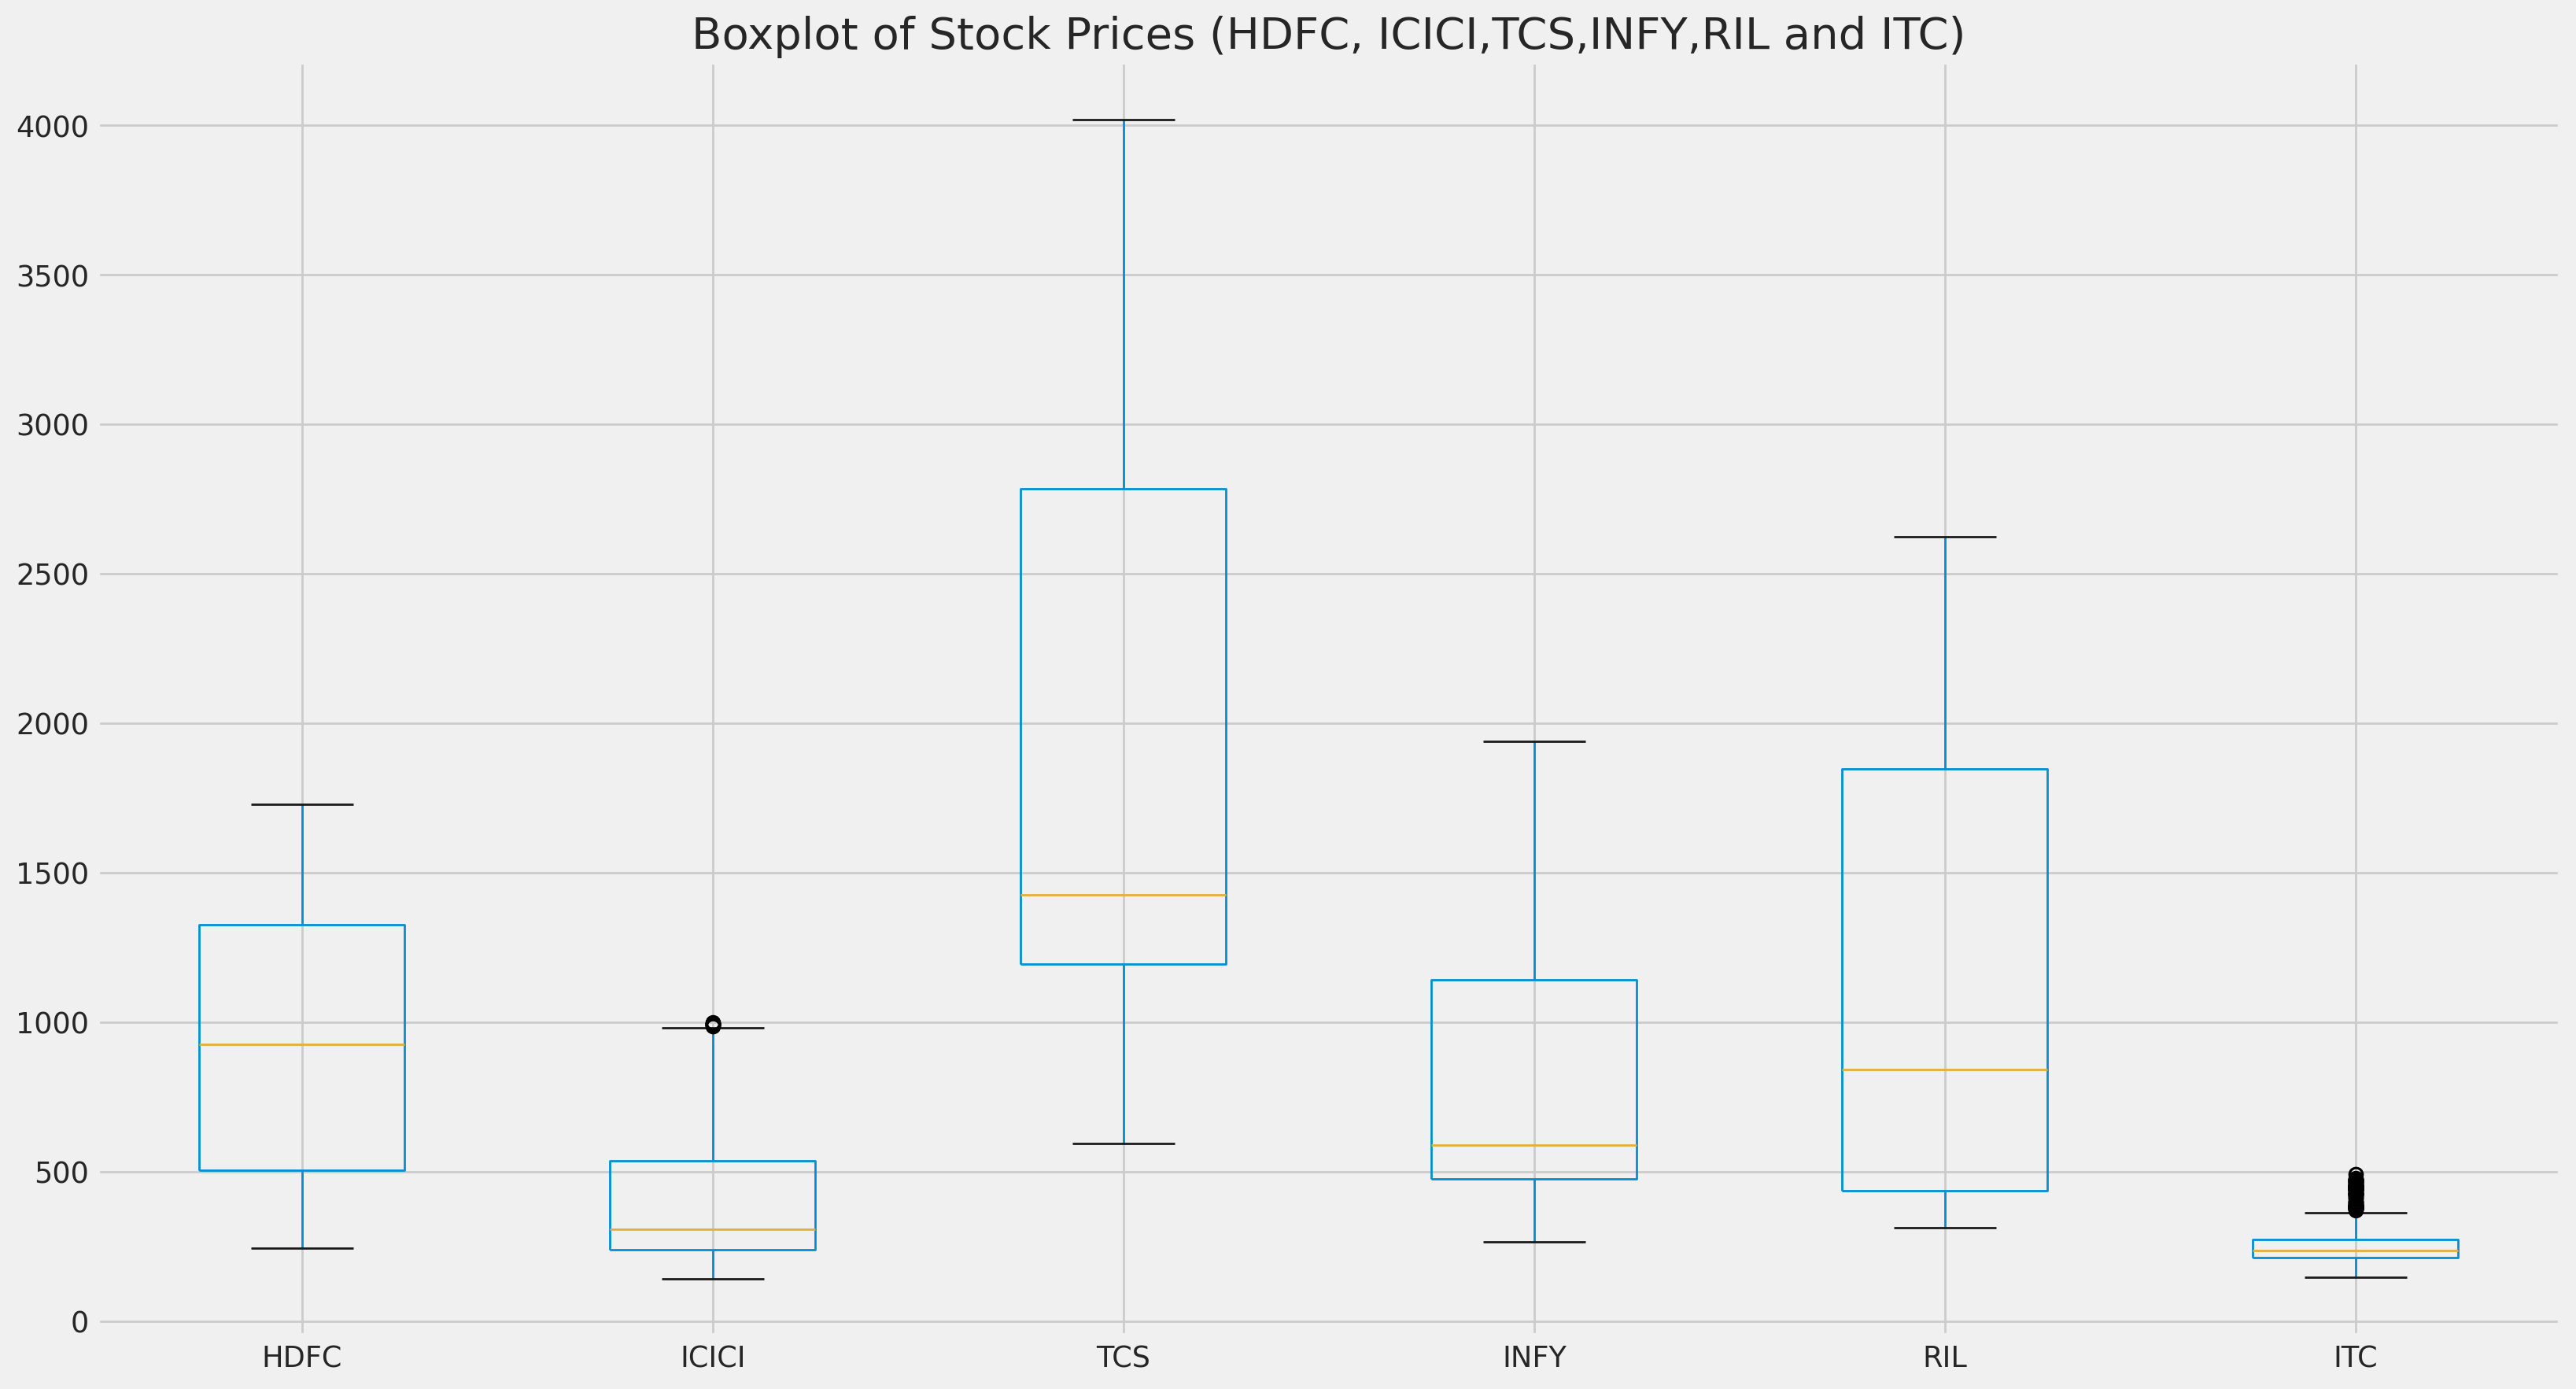

In [64]:
plt.style.use("fivethirtyeight")
dataset[['HDFC', 'ICICI', 'TCS','INFY','RIL','ITC']].boxplot()
plt.title("Boxplot of Stock Prices (HDFC, ICICI,TCS,INFY,RIL and ITC)")
plt.show()

> The boxplot reveals the presence of outliers in 'HDFC', 'ICICI', 'TCS','INFY','RIL' and 'ITC' stock prices, indicating significant deviations from the overall pattern. These outliers suggest the occurrence of notable events or market conditions that impacted the stock prices of these companies. Further analysis is required to understand the factors influencing these outliers and their implications for investment decisions.

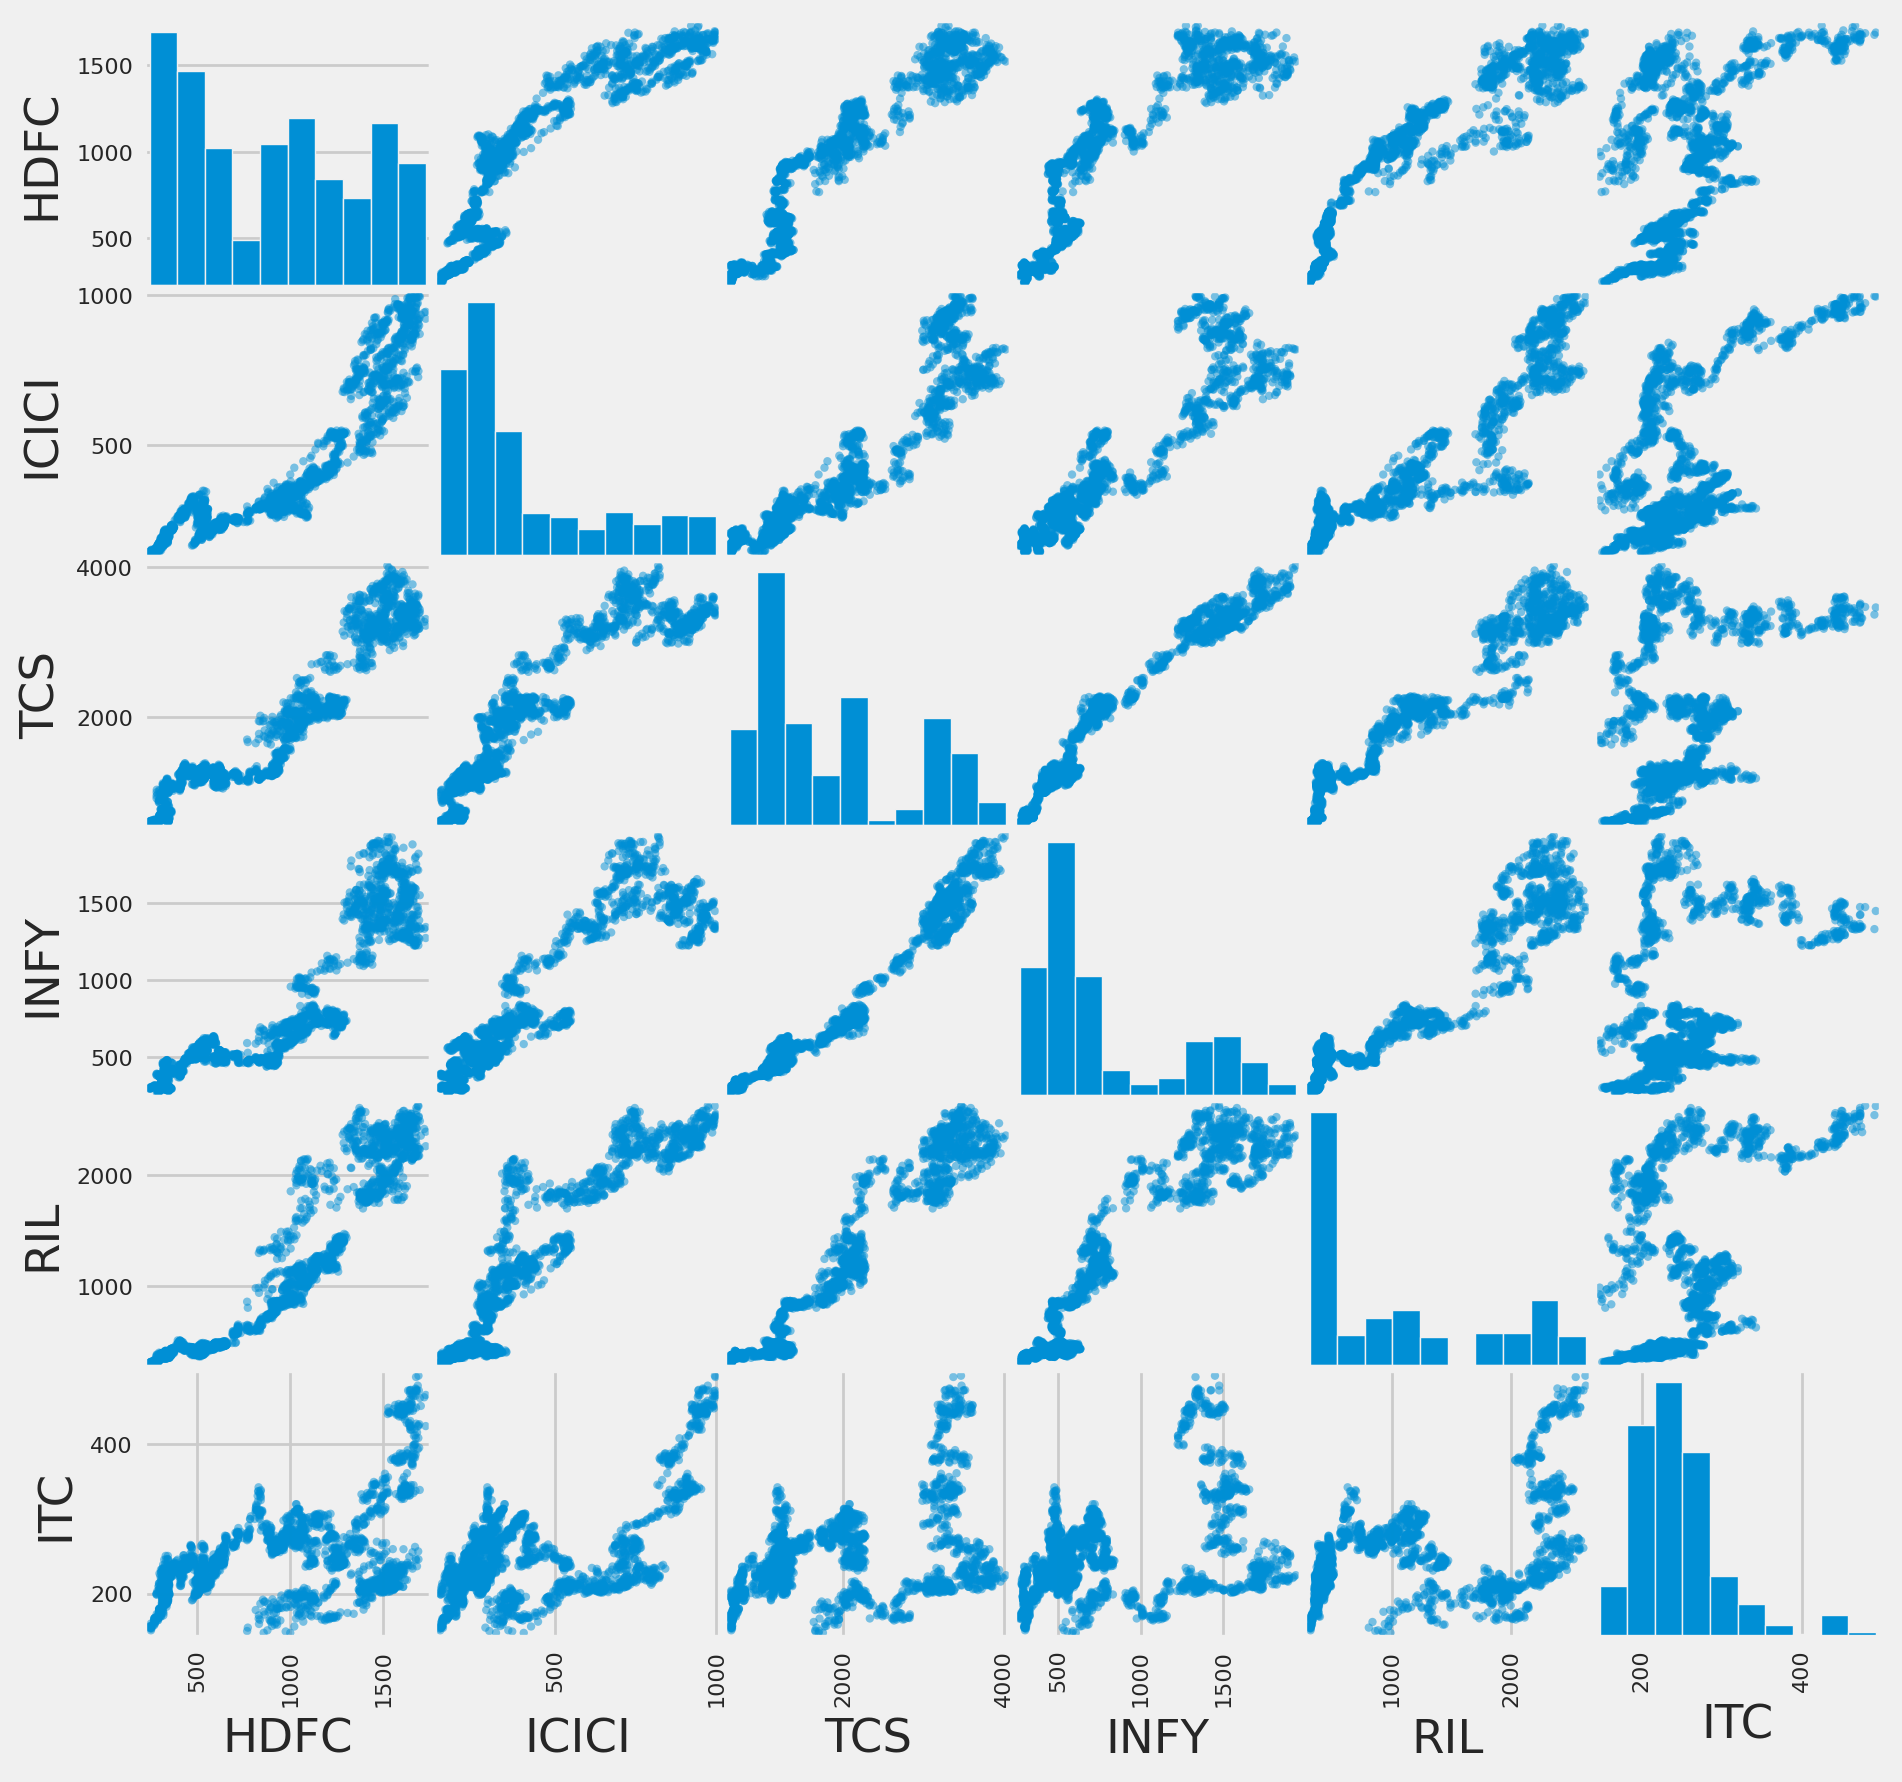

In [66]:
pd.plotting.scatter_matrix(dataset[['HDFC', 'ICICI', 'TCS','INFY','RIL','ITC']], figsize=(10,10))
plt.show()

> The stock market distributions for ICICI and ITC exhibit a correct skewed pattern, indicating potential outliers or extreme values in the data.

## Visualization of the closing prices evolution of each company

In [67]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

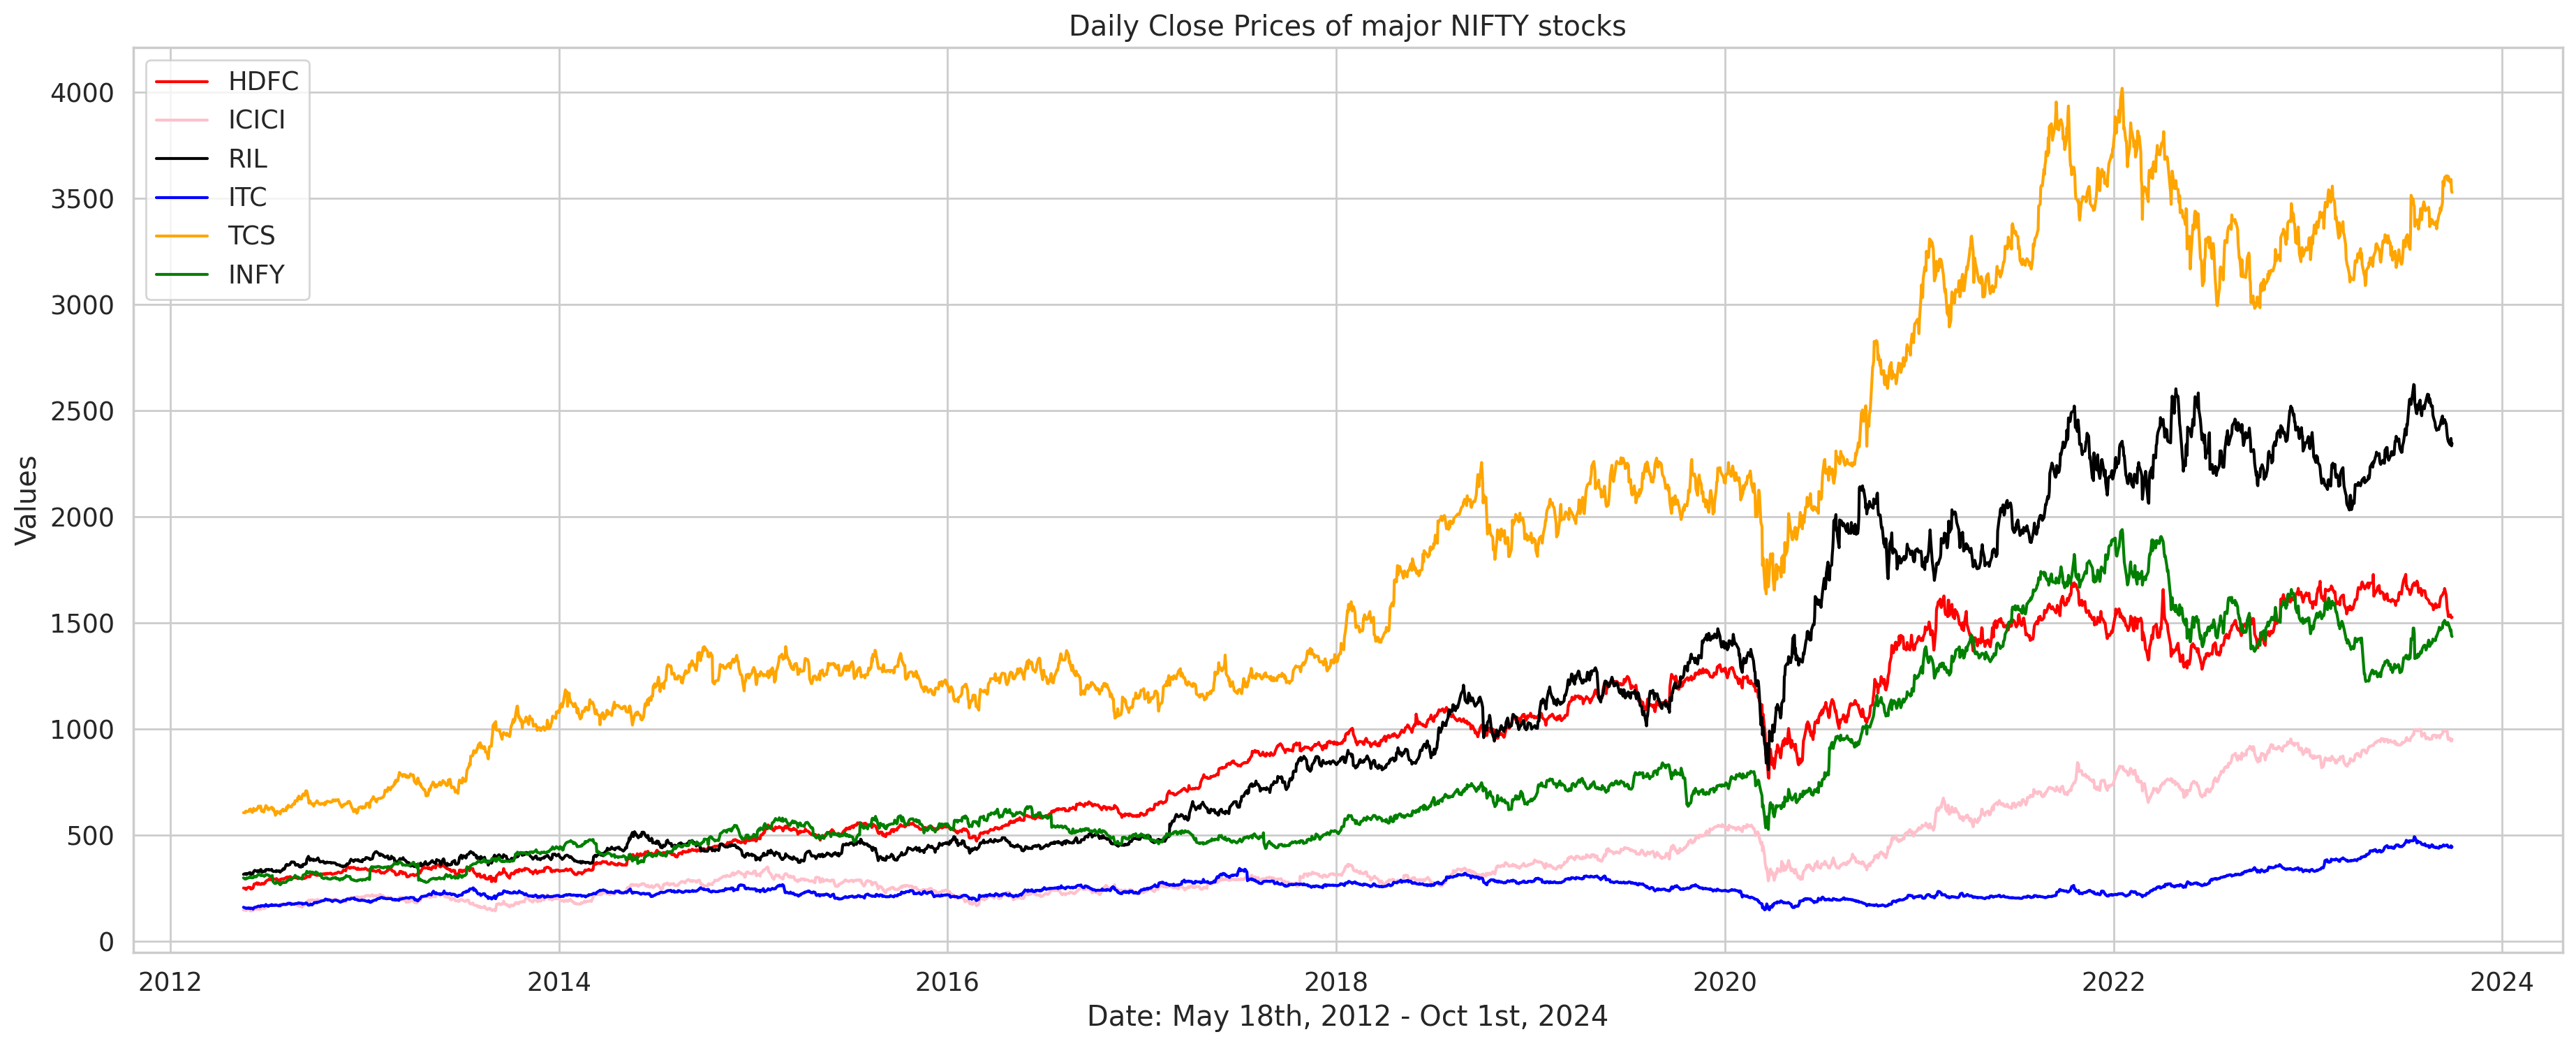

In [69]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of major NIFTY stocks')
plt.xlabel('Date: May 18th, 2012 - Oct 1st, 2024')
plt.ylabel('Values')
plt.plot(dataset['HDFC'], 'red', label='HDFC')
plt.plot(dataset['ICICI'], 'pink', label='ICICI')
plt.plot(dataset['RIL'], 'black', label='RIL')
plt.plot(dataset['ITC'], 'blue', label='ITC')
plt.plot(dataset['TCS'], 'orange', label='TCS')
plt.plot(dataset['INFY'], 'green', label='INFY')
plt.legend()
plt.show()

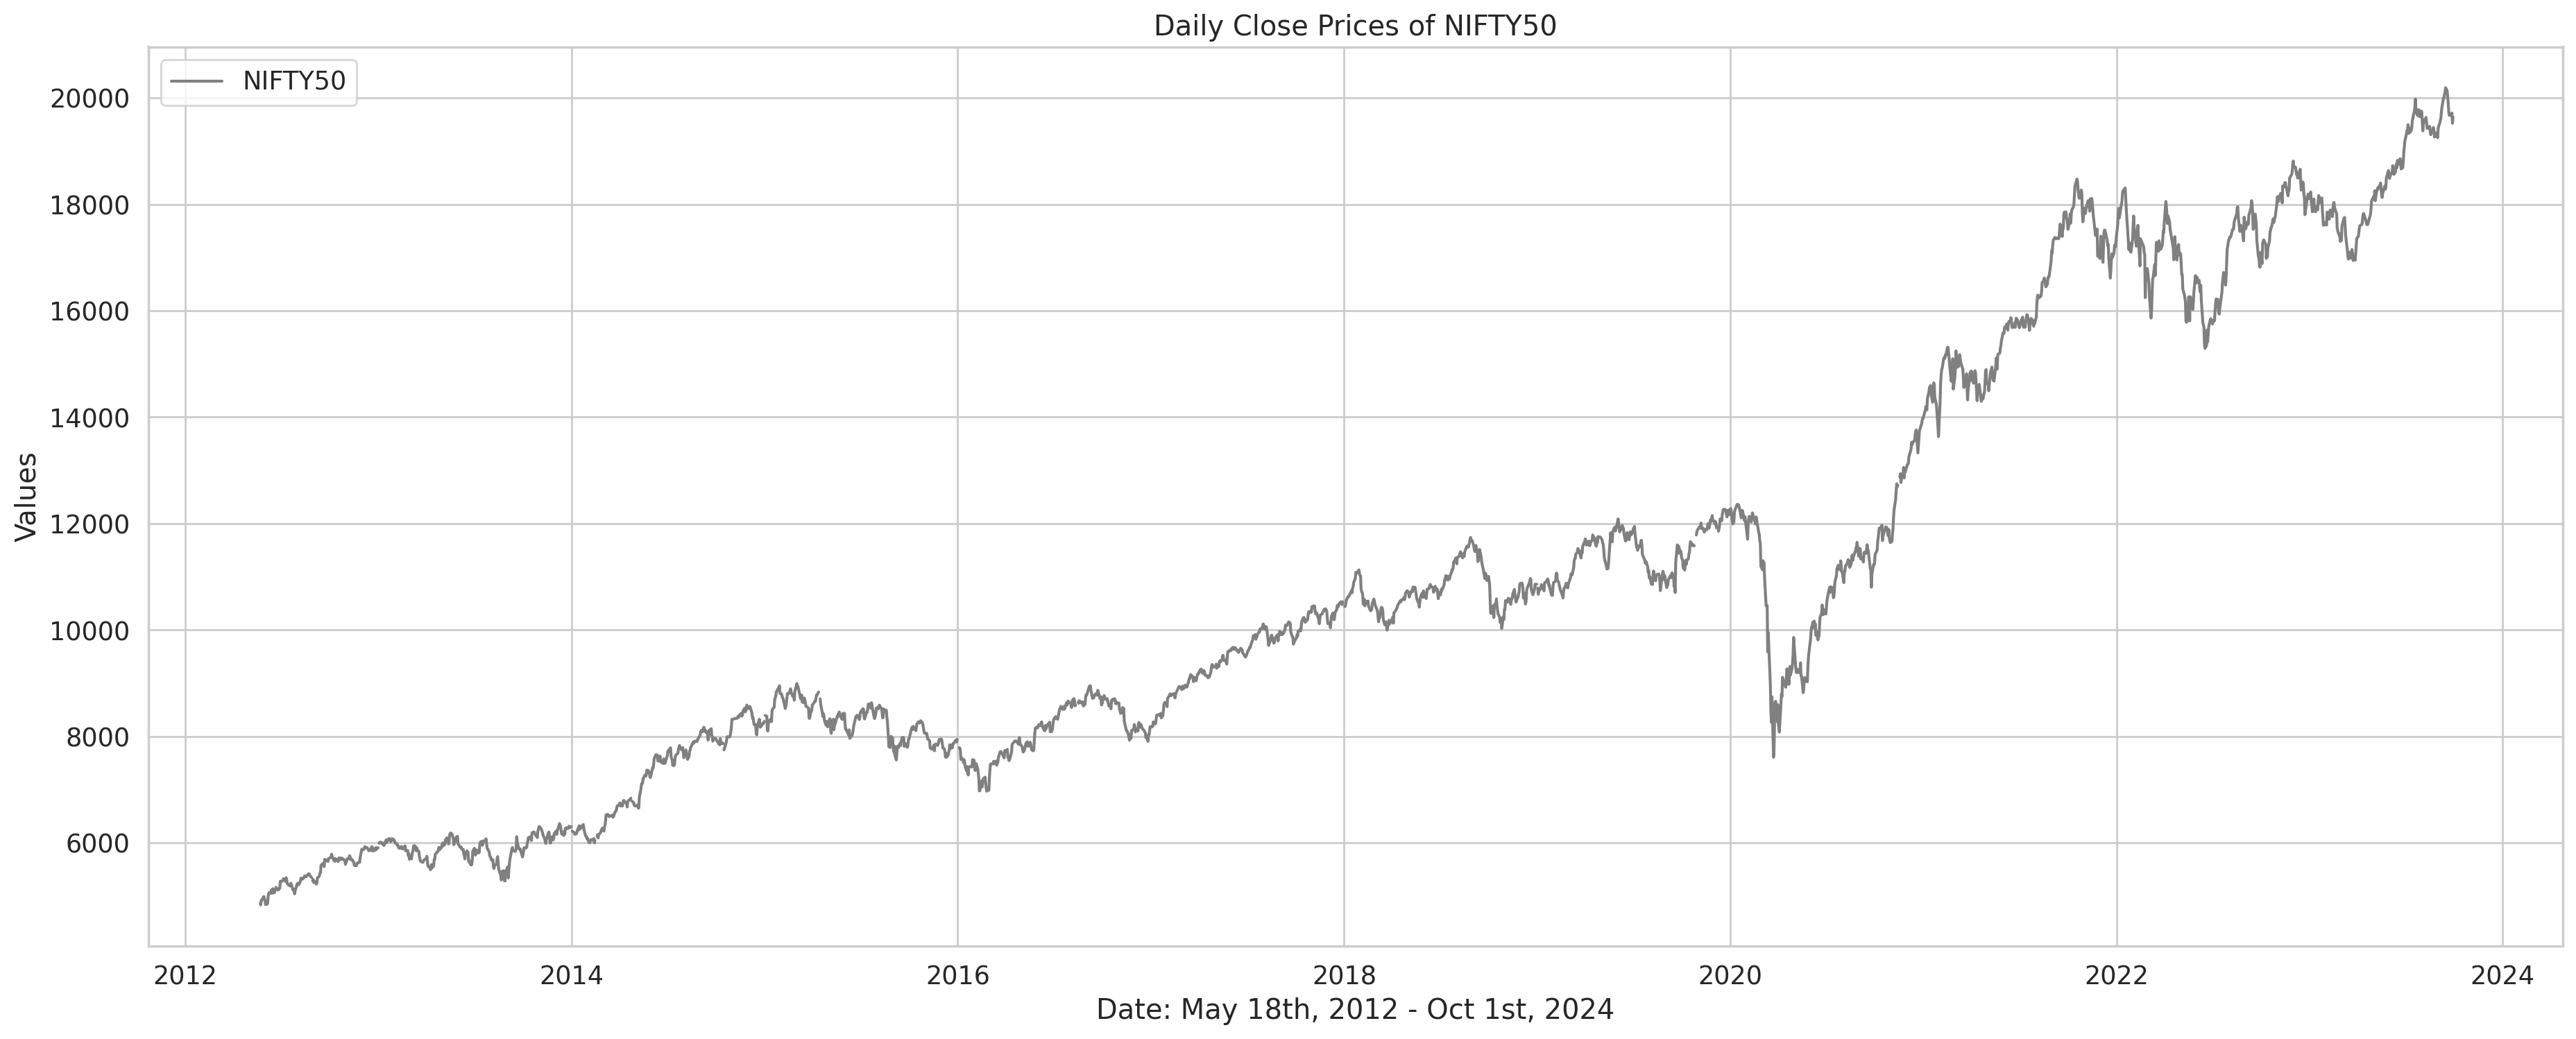

In [71]:
plt.figure(figsize=(20,8))
plt.grid(True)
plt.title('Daily Close Prices of NIFTY50')
plt.xlabel('Date: May 18th, 2012 - Oct 1st, 2024')
plt.ylabel('Values')
plt.plot(dataset['NIFTY'], 'grey', label='NIFTY50')
plt.legend()
plt.show()

The stock prices of top NIFTY companies took a hit during COVID-19 crisis in early 2020, followed by a recovery and subsequent fluctuations. Notably, RIL and TCS experienced a significant drop in its stock price during this period.

## Standard risk measure: Volatility (Returns)



Volatility is a standard risk measure that assesses the price fluctuations and stability of financial assets. The stock prices of NIFTY companies are known for their dynamic and often volatile nature, driven by rapid technological advancements and market disruptions. This higher volatility reflects the risks associated with investing in these companies. On the other hand, the NIFTY50, a broad market index representing 50 large-cap Indian companies, generally experiences lower volatility due to its diversified nature. However, during periods of market turbulence, the NIFTY50 can also exhibit increased volatility. Understanding and considering volatility is crucial for investors to evaluate risk and make informed investment decisions.

### Create a new columns in Dataset - Returns




The formula for Simple Return is a basic calculation that measures the percentage change in the value of an investment over a given period.

**Simple Return**
$$r_t=\frac{P_t-P_{t-1}}{P_{t-1}}$$

In [121]:
#Create a new columns Return in the dataset for each company's
dataset['R_INFY'] = dataset[['INFY']].pct_change(1)
dataset['R_TCS'] = dataset[['TCS']].pct_change(1)
dataset['R_RIL'] = dataset[['RIL']].pct_change(1)
dataset['R_ITC'] = dataset[['ITC']].pct_change(1)
dataset['R_HDFC'] = dataset[['HDFC']].pct_change(1)
dataset['R_ICICI'] = dataset[['ICICI']].pct_change(1)
dataset['R_NIFTY'] = dataset[['NIFTY']].pct_change(1)
dataset.head()

HDFC       ICICI         TCS        INFY         RIL  \
Date                                                                     
2012-05-18  250.274994  146.399994  605.325012  297.856262  314.781891   
2012-05-21  248.725006  147.472733  604.599976  292.556244  317.959198   
2012-05-22  244.625000  145.600006  612.025024  292.637512  315.947662   
2012-05-23  243.600006  144.236359  612.575012  293.524994  314.004700   
2012-05-24  249.850006  149.199997  610.724976  297.600006  317.867767   

                   ITC        NIFTY    R_INFY     R_TCS     R_RIL     R_ITC  \
Date                                                                          
2012-05-18  159.699997  4891.450195       NaN       NaN       NaN       NaN   
2012-05-21  156.566666          NaN -0.017794 -0.001198  0.010094 -0.019620   
2012-05-22  155.166672  4860.500000  0.000278  0.012281 -0.006326 -0.008942   
2012-05-23  154.466660  4835.649902  0.003033  0.000899 -0.006150 -0.004511   
2012-05-24  155.566666  4921.399902  0.013883 -0.003020  0.012303  0.007121   

              R_HDFC   R_ICICI   R_NIFTY  
Date                                      
2012-05-18       NaN       NaN       NaN  
2012-05-21 -0.006193  0.007327  0.000000  
2012-05-22 -0.016484 -0.012699 -0.006327  
2012-05-23 -0.004190 -0.009366 -0.005113  
2012-05-24  0.025657  0.034413  0.017733

In [75]:
dataset.describe()

HDFC        ICICI          TCS         INFY          RIL  \
count  2805.000000  2805.000000  2805.000000  2805.000000  2805.000000   
mean    908.558316   408.532560  1897.603645   791.252173  1098.930167   
std     453.099316   234.940668   956.488983   450.655321   748.150709   
min     243.600006   142.127274   592.950012   265.475006   313.273254   
25%     503.774994   237.681824  1193.175049   475.399994   436.022400   
50%     925.525024   306.899994  1425.425049   589.750000   842.557617   
75%    1324.800049   537.250000  2783.600098  1140.900024  1848.353027   
max    1728.199951   998.299988  4019.149902  1939.500000  2623.026611   

               ITC         NIFTY       R_INFY        R_TCS        R_RIL  \
count  2805.000000   2790.000000  2804.000000  2804.000000  2804.000000   
mean    249.941265  10851.013986     0.000714     0.000744     0.000868   
std      59.793614   4088.068117     0.017420     0.015155     0.017450   
min     147.250000   4835.649902    -0.212586    -0.094103    -0.131539   
25%     211.399994   7899.187378    -0.007755    -0.007343    -0.008912   
50%     236.366669  10144.350098     0.000794     0.000620     0.000476   
75%     273.850006  13348.912598     0.009675     0.008861     0.010084   
max     492.149994  20192.349609     0.167851     0.098451     0.147180   

             R_ITC       R_HDFC      R_ICICI      R_NIFTY  
count  2804.000000  2804.000000  2804.000000  2804.000000  
mean      0.000495     0.000751     0.000876     0.000551  
std       0.016080     0.014589     0.020407     0.010457  
min      -0.128143    -0.126069    -0.178478    -0.129805  
25%      -0.007749    -0.006692    -0.009899    -0.004490  
50%       0.000372     0.000396     0.000143     0.000662  
75%       0.008855     0.007691     0.010925     0.006117  
max       0.100457     0.115996     0.146877     0.087632

In [76]:
# Daily volatility (in %) of each stock
dataset[['R_ITC','R_RIL','R_HDFC','R_ICICI','R_INFY','R_TCS','R_NIFTY']].std()

R_ITC      0.016080
R_RIL      0.017450
R_HDFC     0.014589
R_ICICI    0.020407
R_INFY     0.017420
R_TCS      0.015155
R_NIFTY    0.010457
dtype: float64

 > The descriptive statistics table provides valuable insights into the risk levels of each stock, as represented by their standard deviations. Among the stocks analysed, ICICI exhibits the highest level of risk with a standard deviation of $2.04\%$, indicating relatively more significant price fluctuations and potential volatility. Following ICICI, RIL has the second highest level of risk with a standard deviation of $1.745\%$.

 > Comparatively, the risk associated with the NIFTY50 is relatively lower, as indicated by its standard deviation of $1.045\%$. This suggests that, on average, the individual stocks of ICICI and RIL carry higher risks than the overall market represented by the NIFTY50. These findings highlight the importance of considering risk factors when making investment decisions. Investors may opt to allocate their portfolio based on their risk appetite, taking into account the higher risk associated with specific stocks such as ICICI and RIL compared to the broader market.

In [78]:
from scipy import stats
def plot_daily_return_histograms(dataset, stocks):
  color_list = ['red', 'blue', 'green', 'purple', 'black', 'pink']
  with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=len(stocks), ncols=2, figsize=(18,12))
    for i in range(len(stocks)):
      axes[i][0].plot(dataset["R_" + stocks[i]], color=color_list[i])
      axes[i][0].set_title("Daily return of: " + stocks[i])
      sns.distplot(dataset["R_" + stocks[i]], norm_hist=True, fit=stats.norm, color=color_list[i],
                bins=50, ax=axes[i][1])
      axes[i][1].set_title('Density of ' + stocks[i] + ' daily returns')
      plt.tight_layout()

    fig.show();

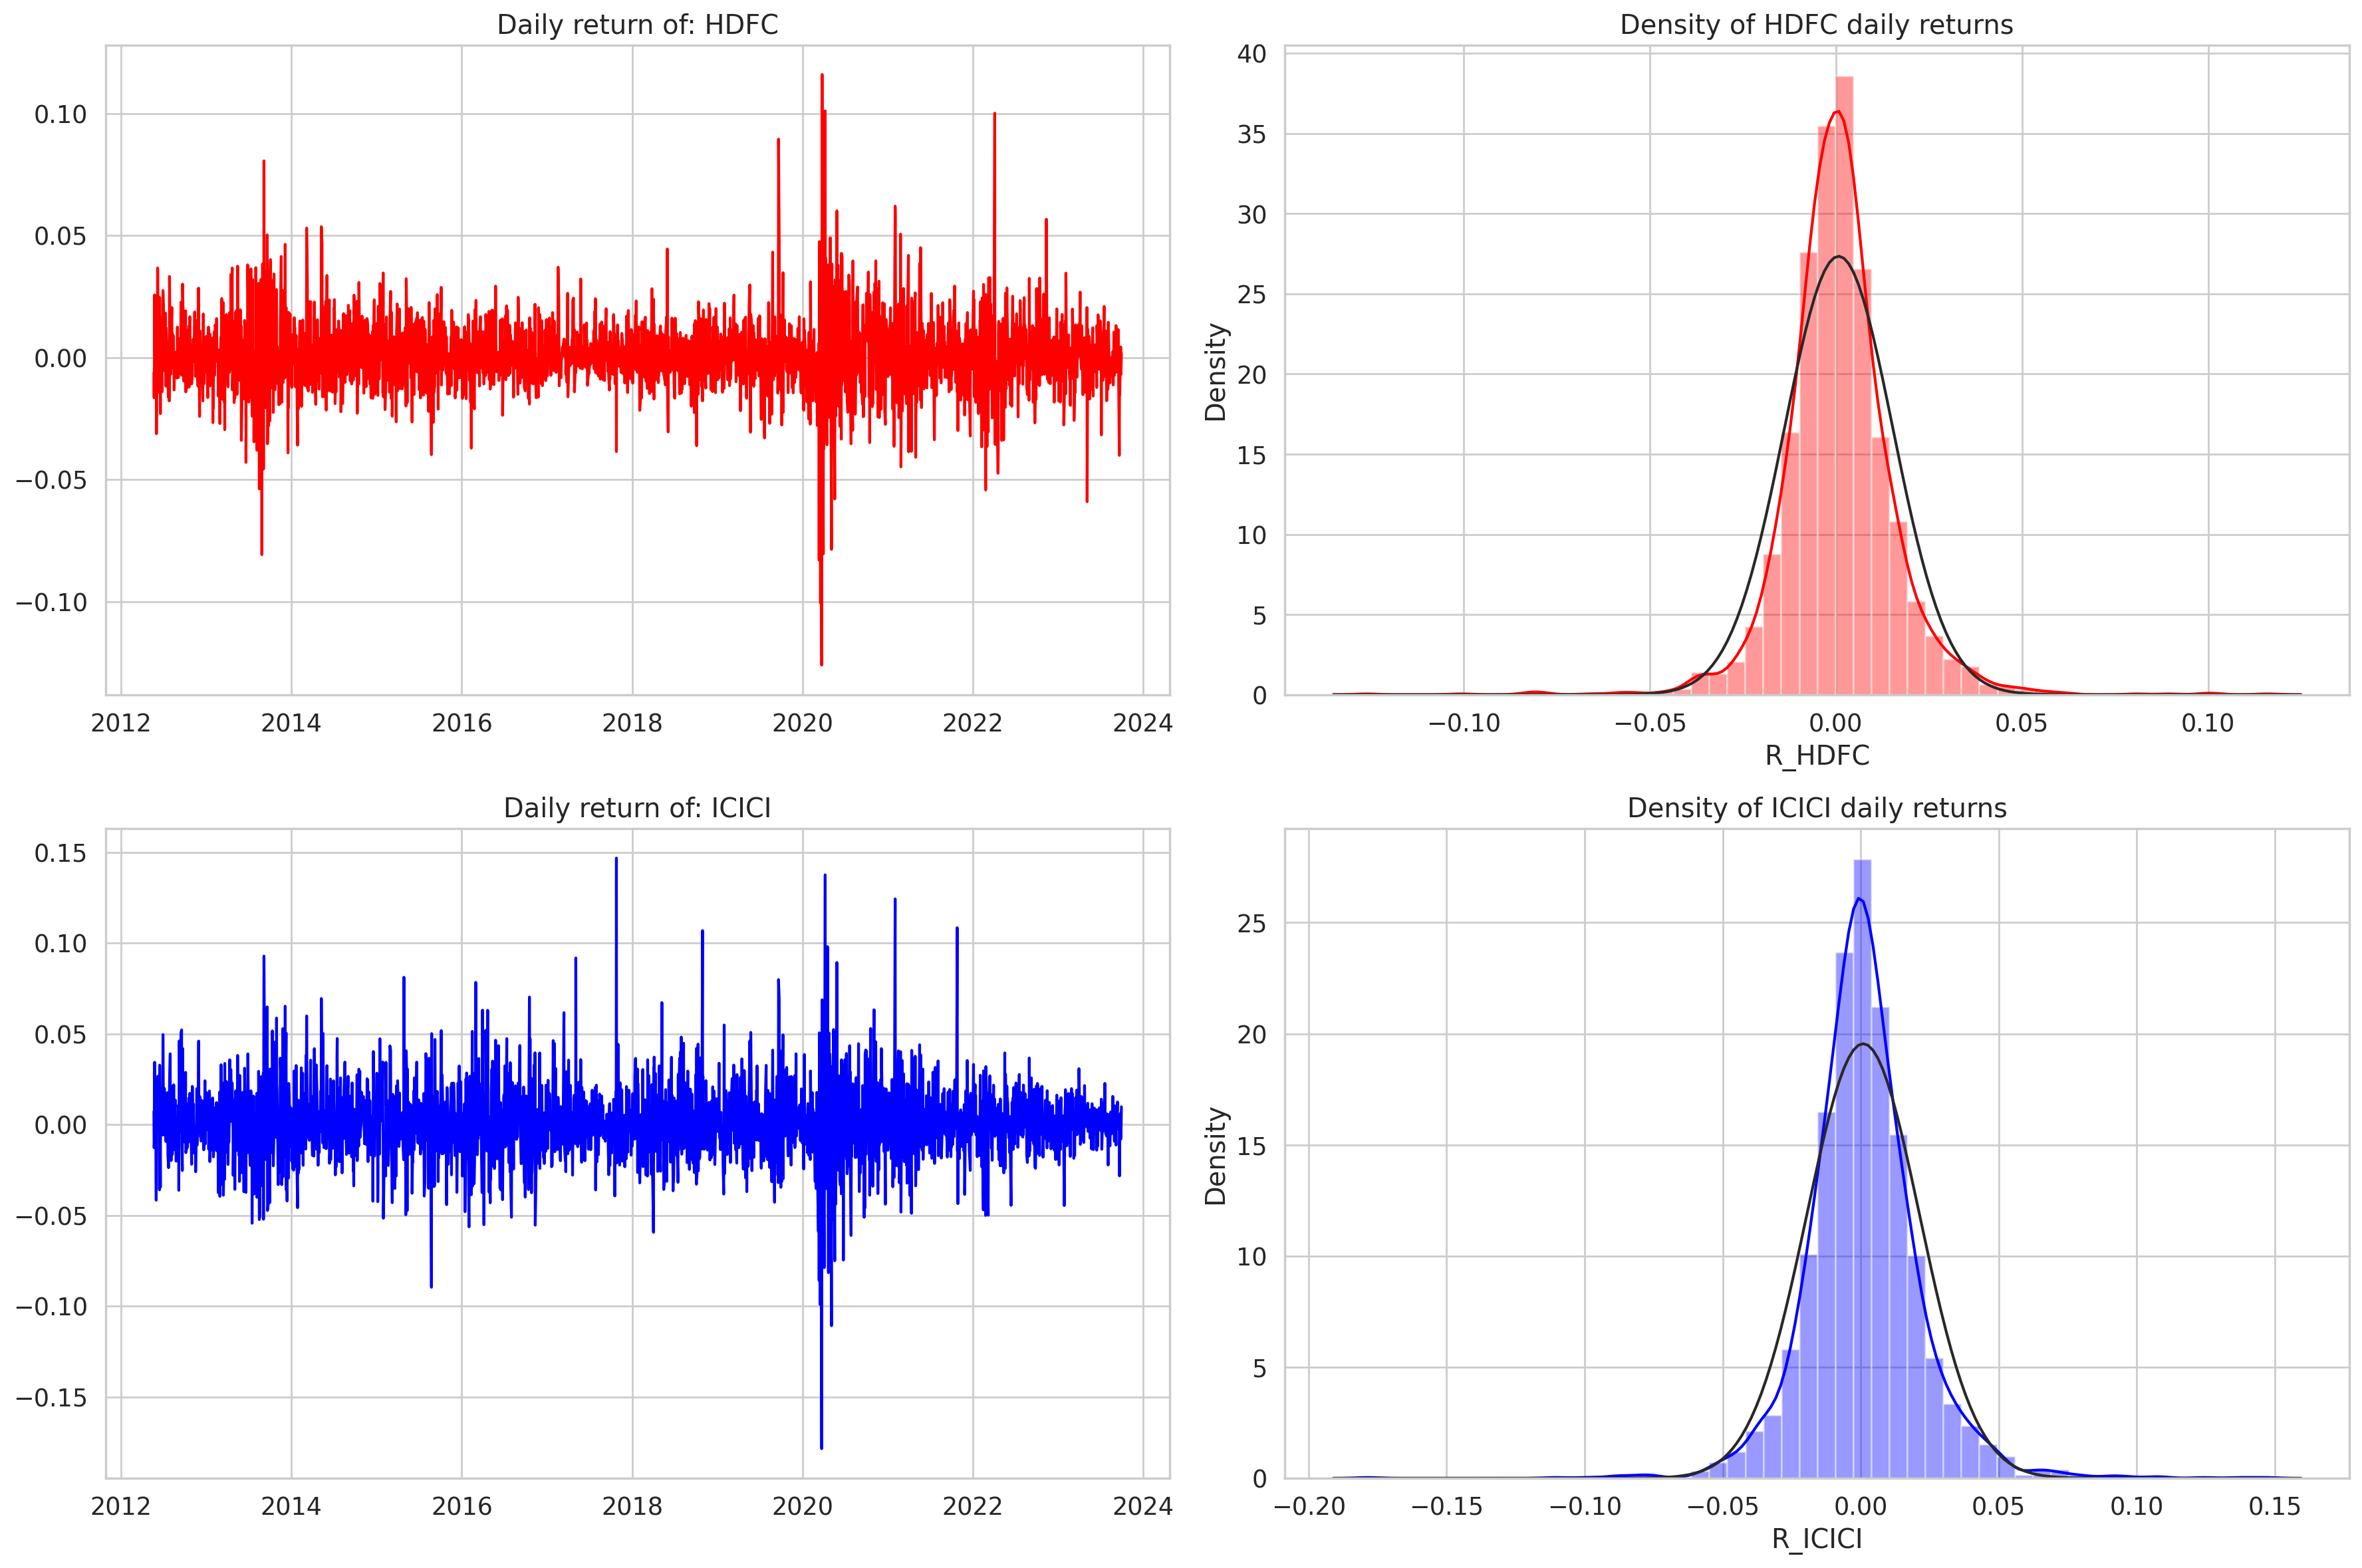

In [79]:
plot_daily_return_histograms(dataset, ['HDFC', 'ICICI'])

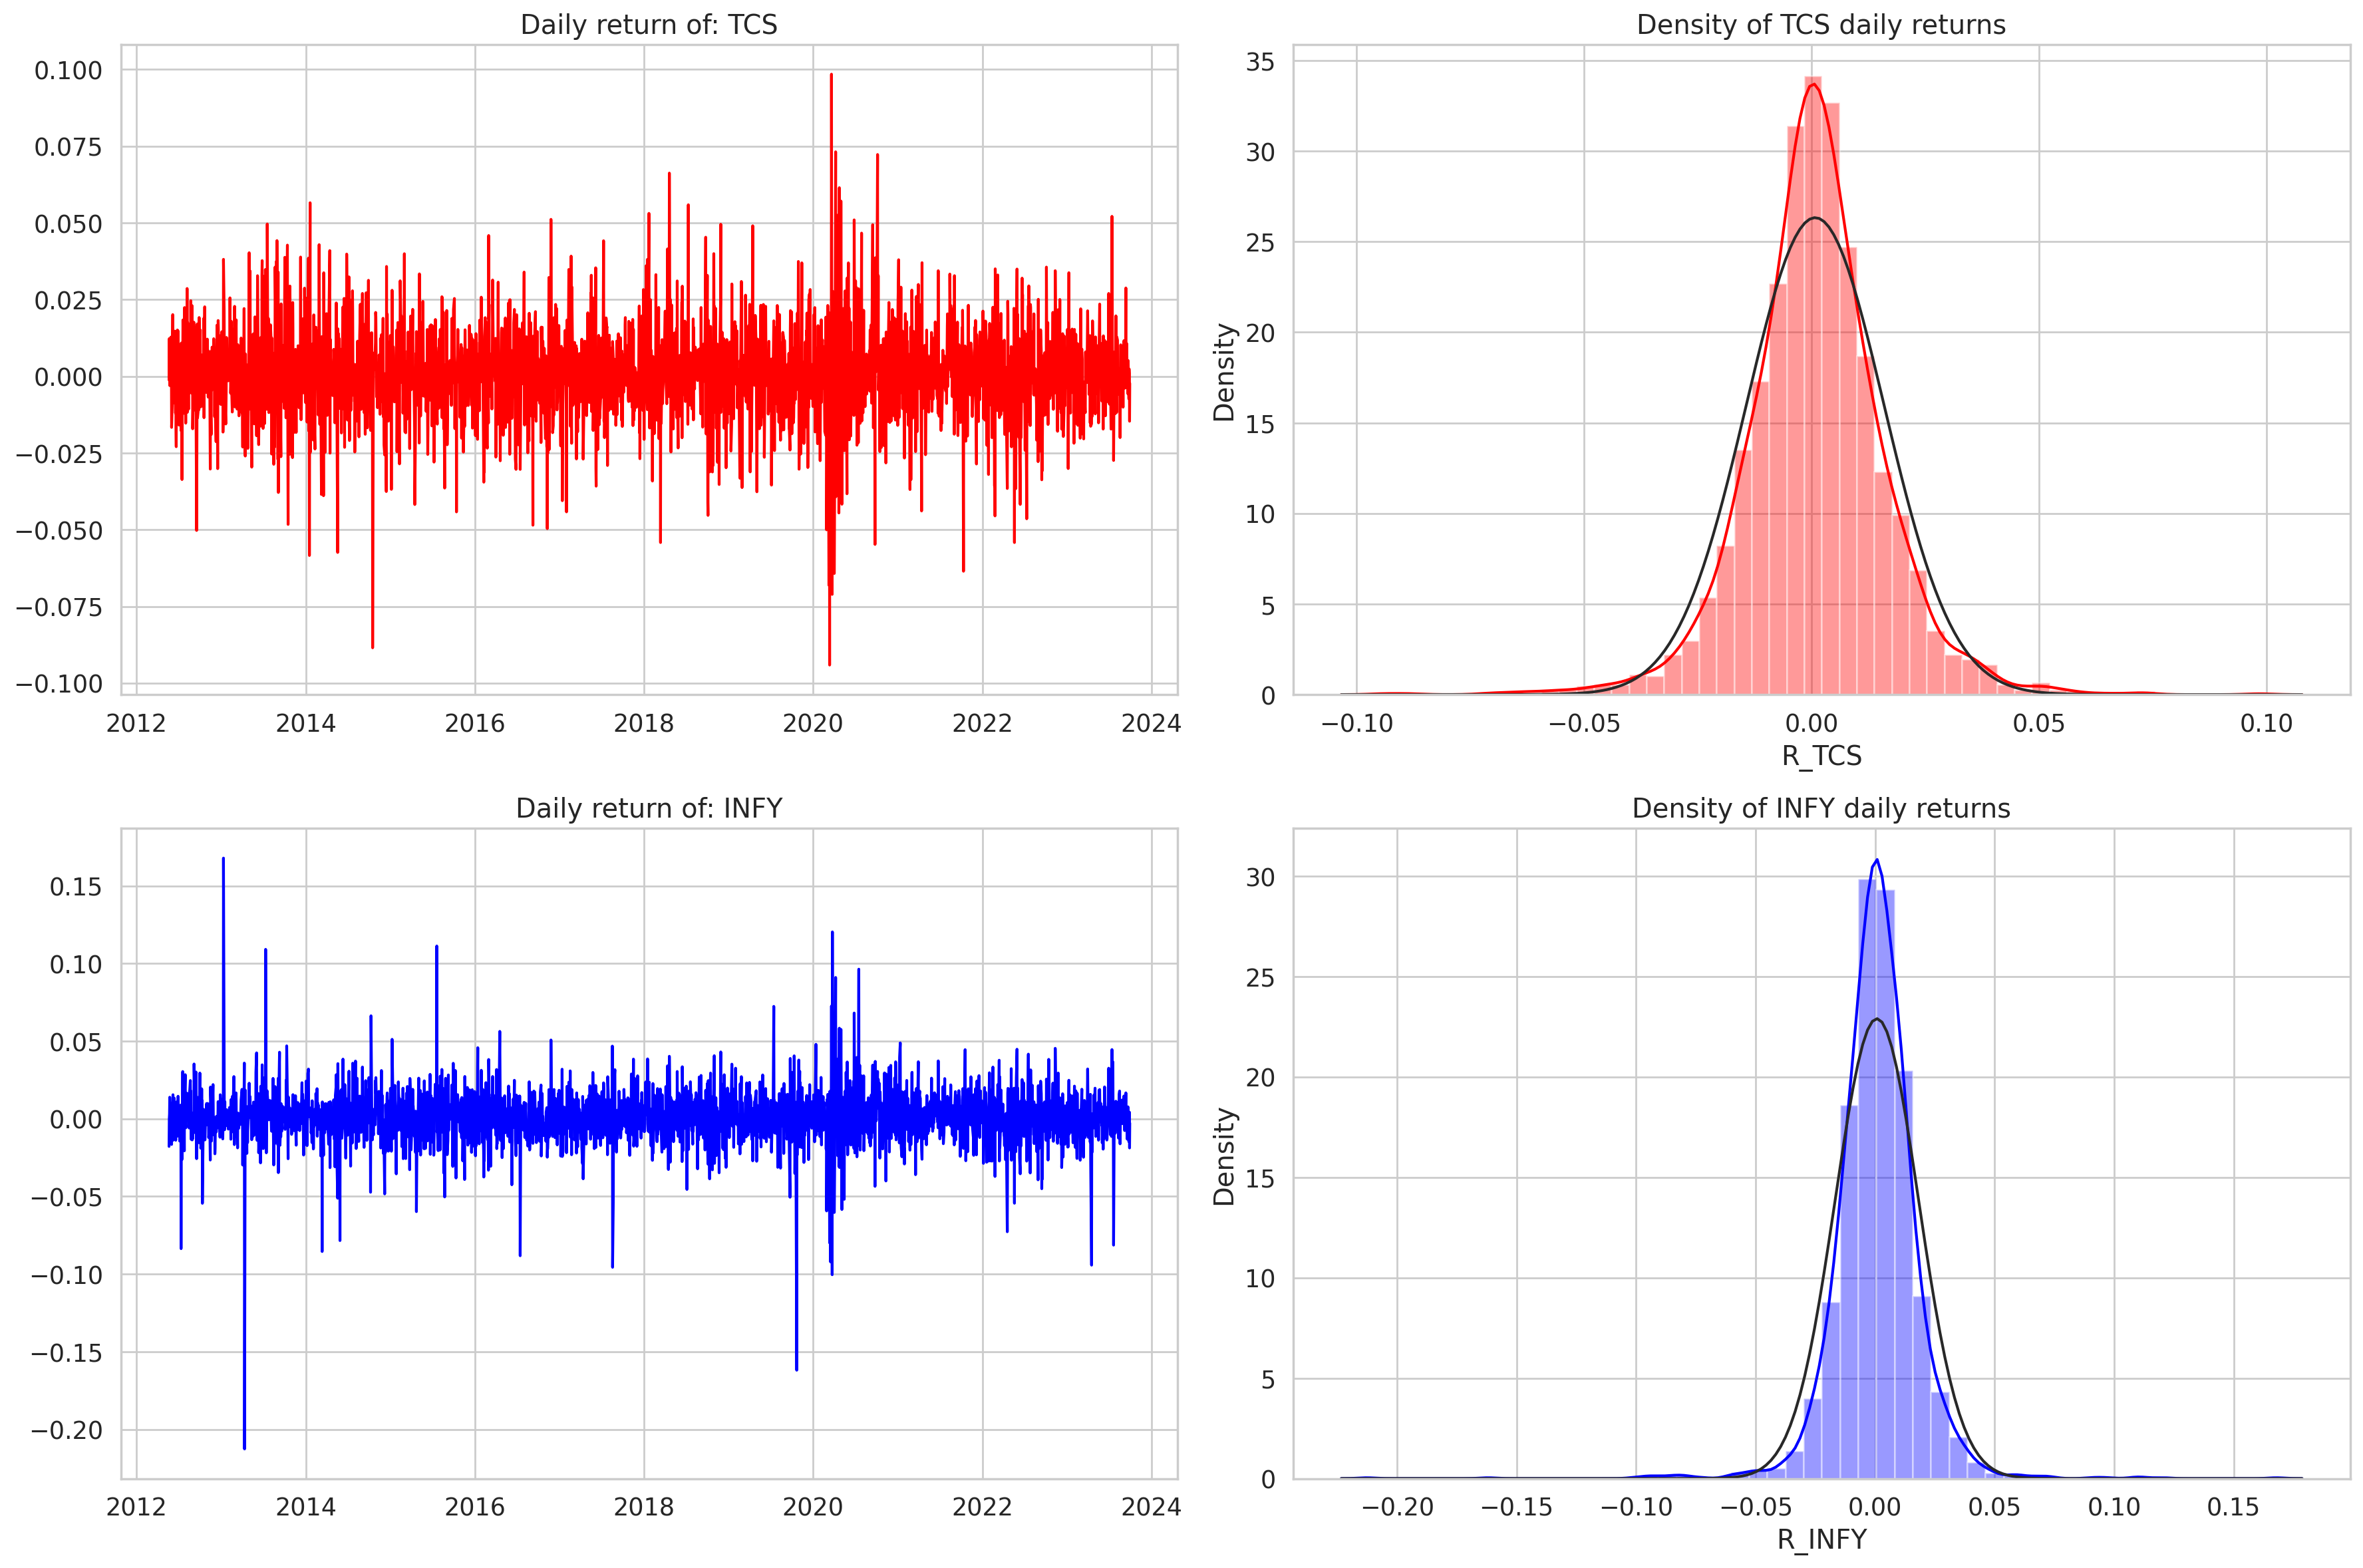

In [80]:
plot_daily_return_histograms(dataset, ['TCS', 'INFY'])

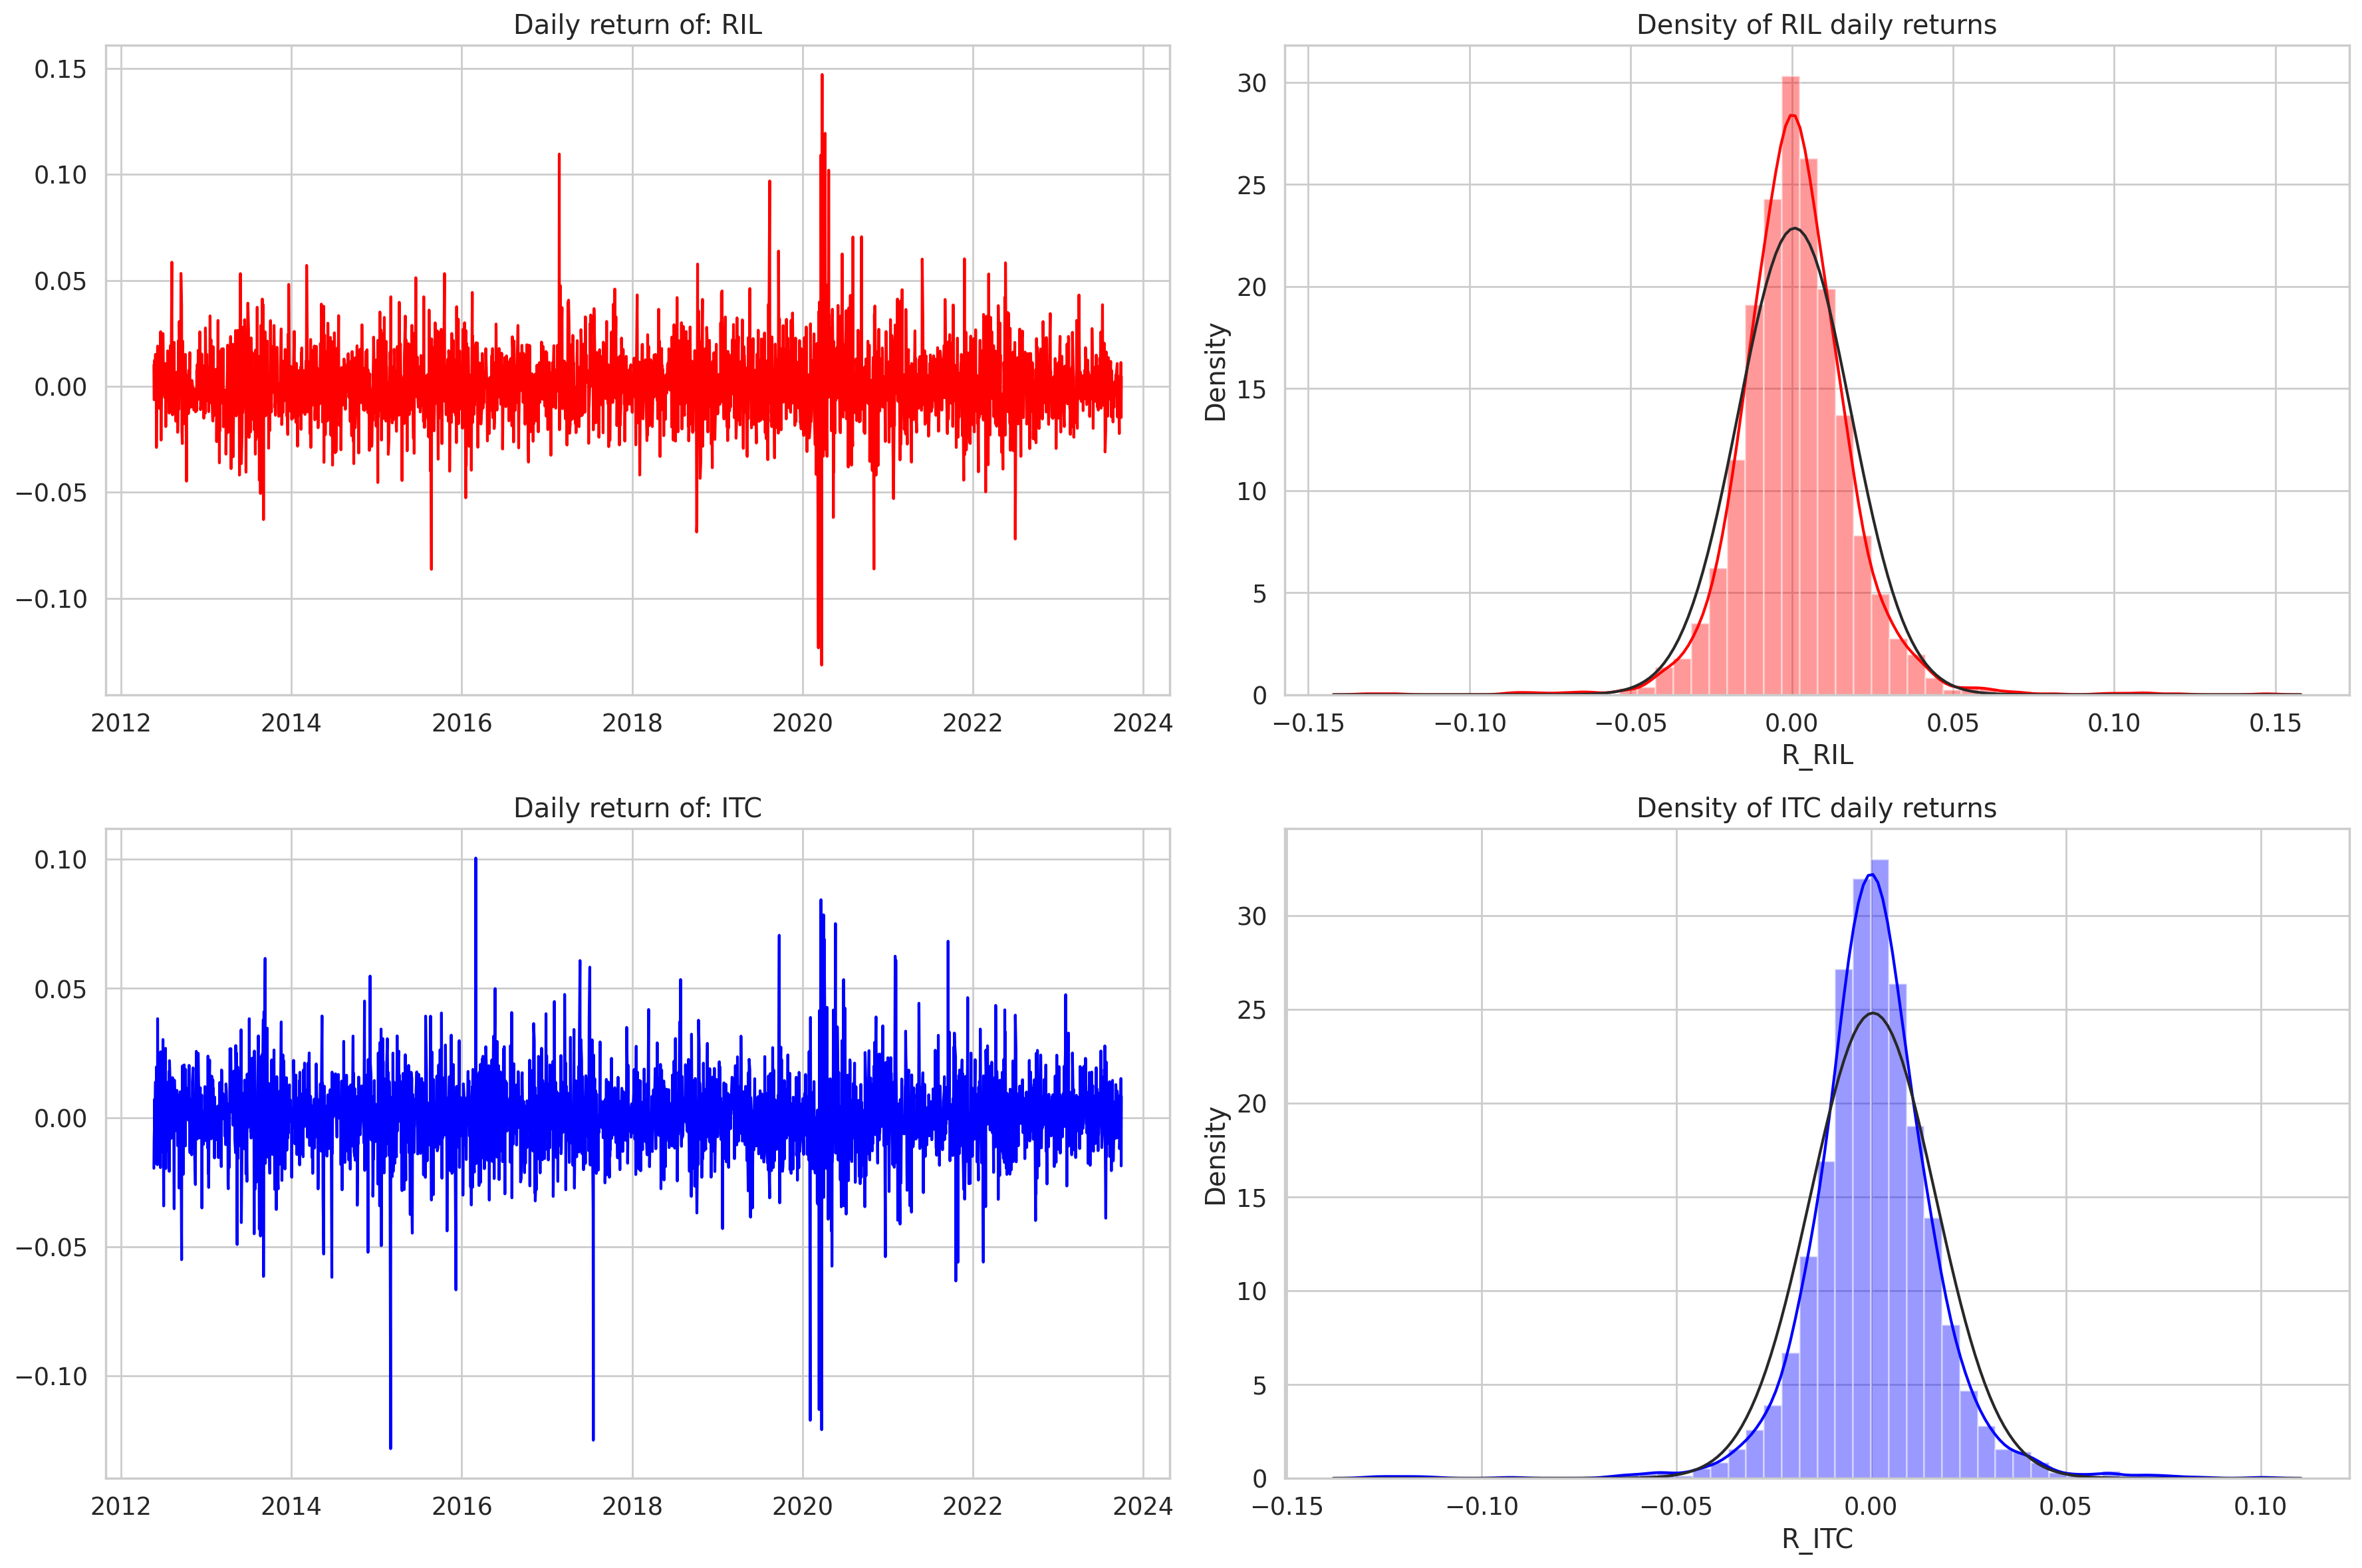

In [81]:
plot_daily_return_histograms(dataset, ['RIL', 'ITC'])

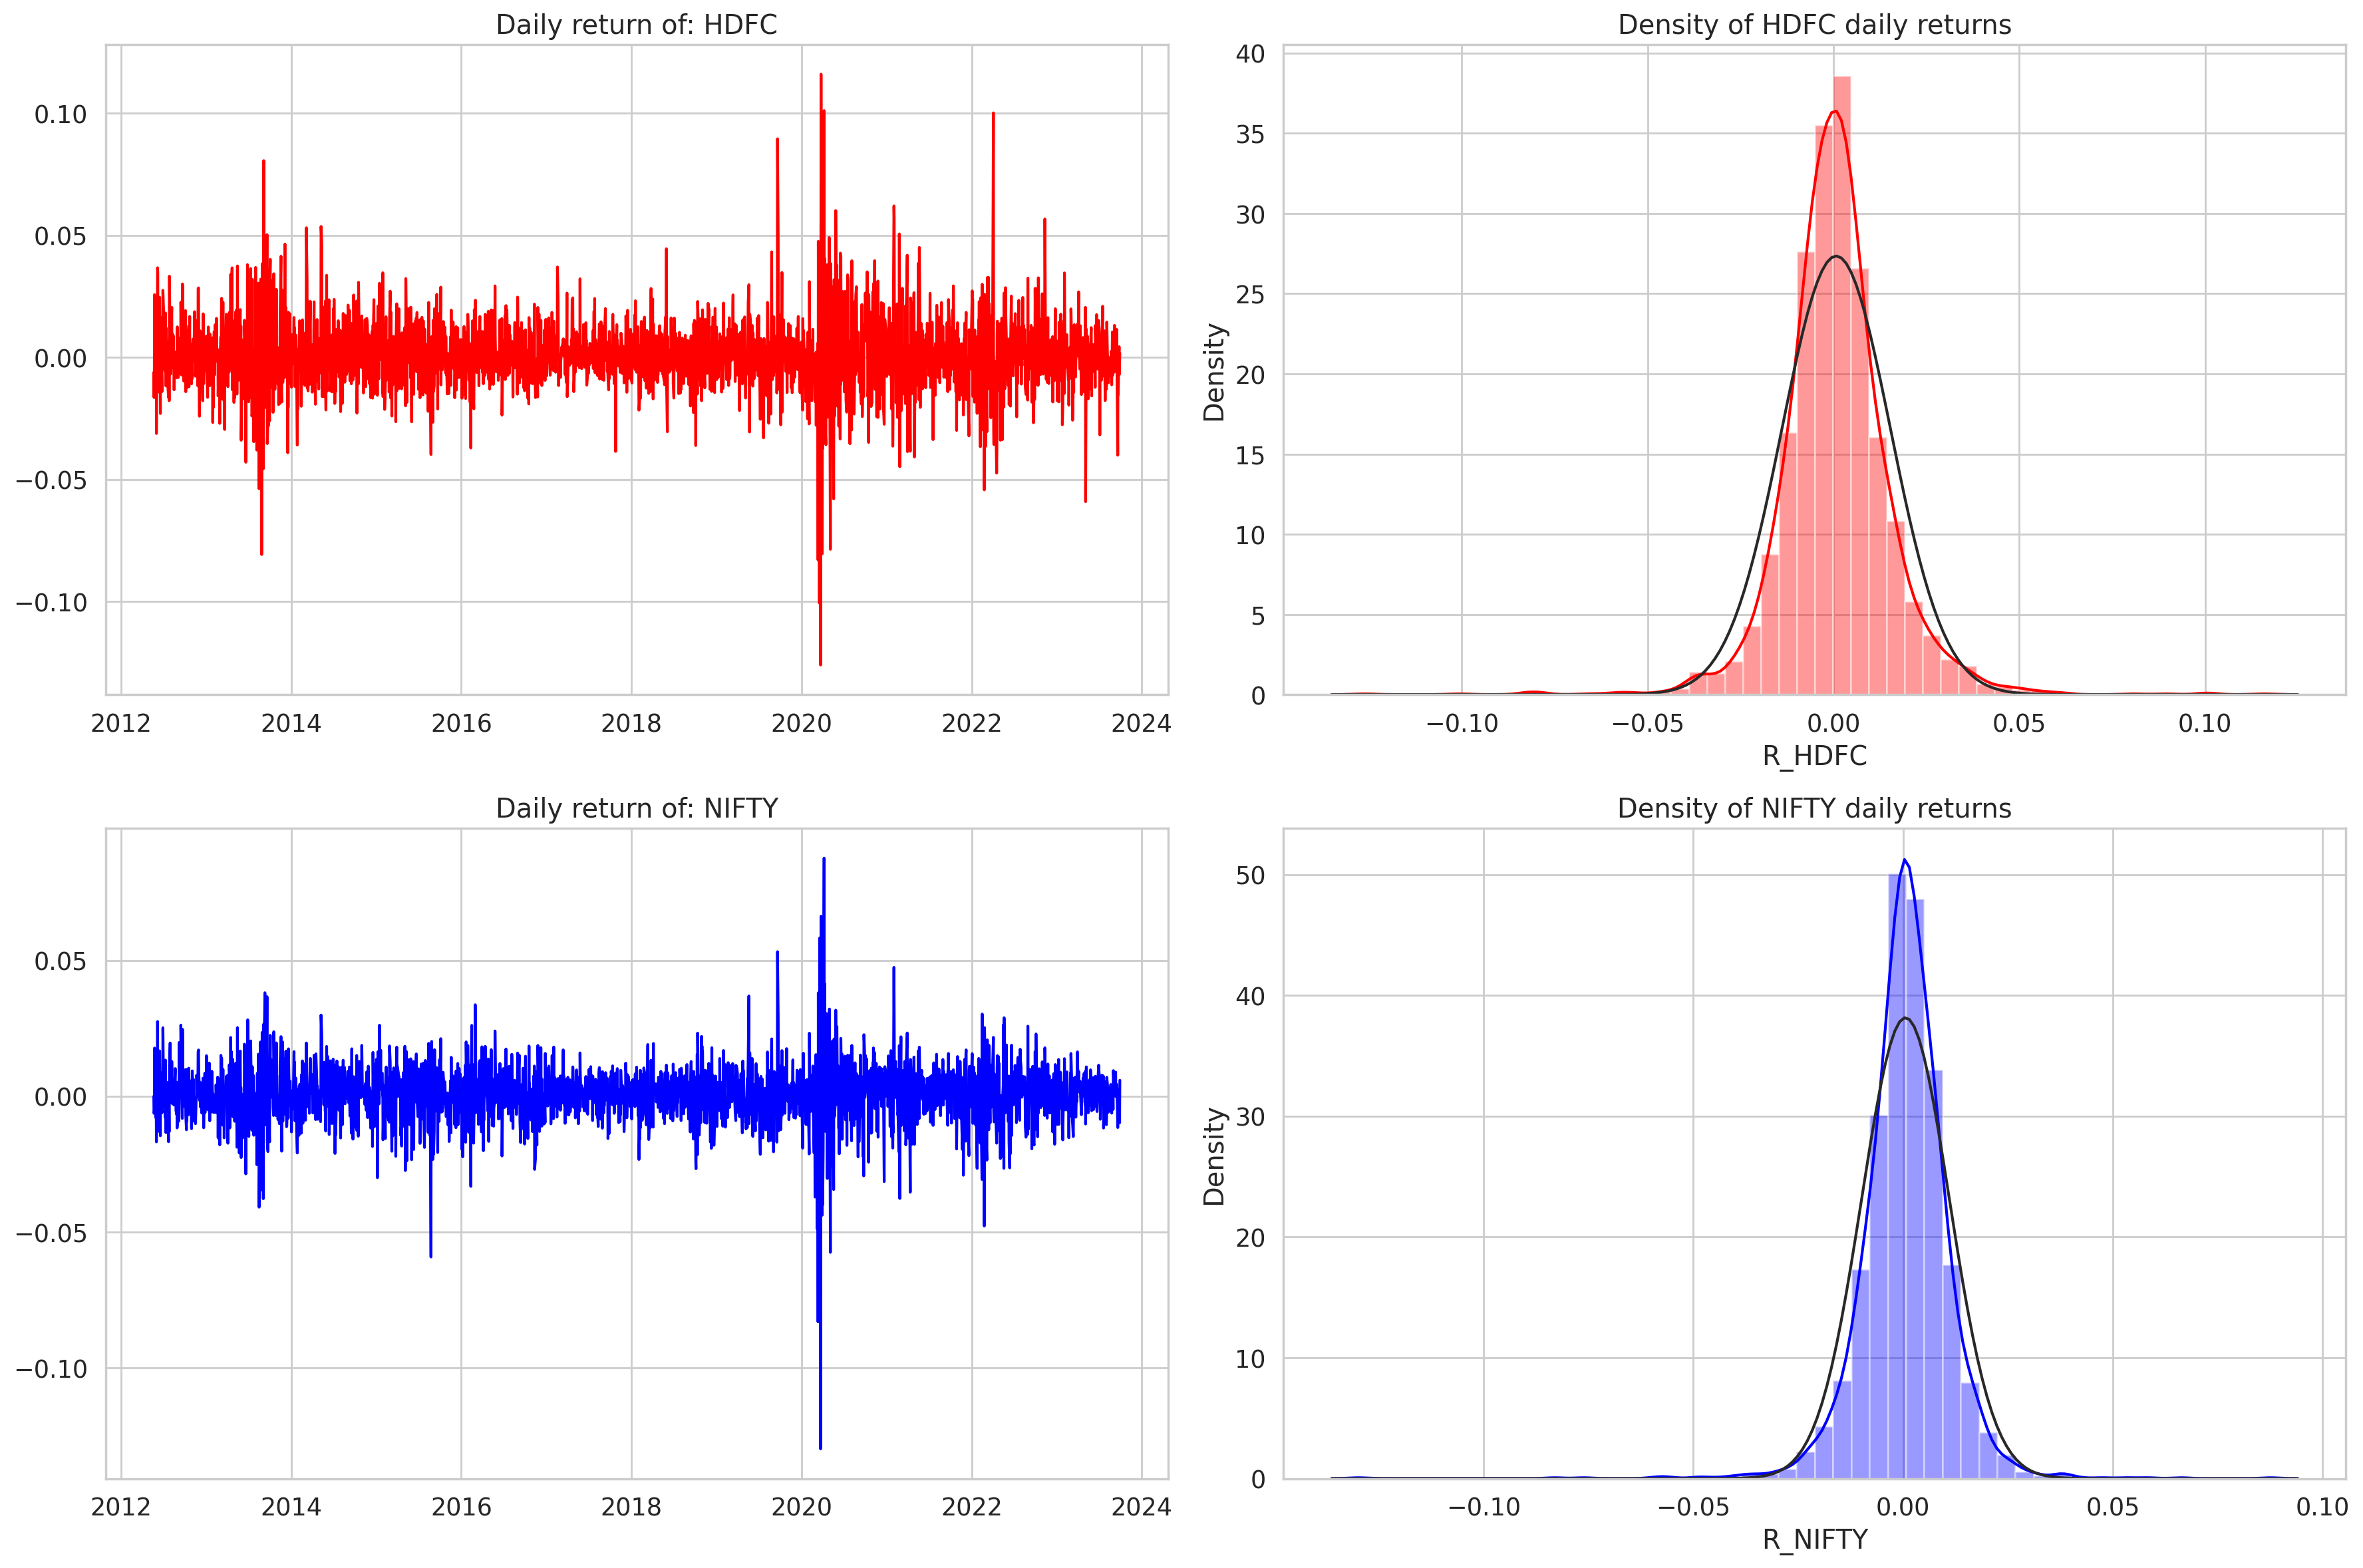

In [82]:
plot_daily_return_histograms(dataset, ['HDFC', 'NIFTY'])

>  The return graphs indicate periods of high volatility in almost all the studied stocks, specially ICICI and RIL particularly at the beginning of 2020 due to the COVID-19 crisis. During this time, the stock returns experienced significant fluctuations and increased volatility, reflecting the pandemic's market uncertainty and economic impact.

> Apart from these volatile periods, the density of returns for each company appears to be symmetric around the origin, suggesting a balanced distribution of positive and negative returns. Additionally, the returns of each company exhibit a pattern that closely follows a normal distribution. This implies on average, the returns of these stocks tend to cluster near the mean value, with fewer extreme outliers.

> Understanding the volatility and distribution of returns is crucial for investors as it provides insights into the potential risks and rewards associated with investing in these companies. It enables investors to evaluate historical performance and make informed decisions based on risk appetite and return expectations.

# Portfolio Optimization using Efficient Frontier

Portfolio Optimization using the Efficient Frontier is a powerful approach to construct an optimal investment portfolio by considering the stock prices of top NIFTY companies (HDFC, ICICI, TCS, INFY, RIL and ITC) and the NIFTY50. The Efficient Frontier is a graphical representation that illustrates the trade-off between risk and return for different portfolio allocations. By analyzing the historical data and expected returns of these stocks, along with their correlations, portfolio optimization techniques can help investors identify the optimal combination of assets that maximize returns for a given level of risk or minimize risk for a desired level of return. This approach allows investors to make well-informed decisions, diversify their investments, and potentially achieve higher returns while managing risk effectively in the context of these prominent Indian companies and the broader market represented by the NIFTY50.

### Correlation coefficients between companies' close prices

The correlation coefficients between the close prices of HDFC, ICICI, TCS, INFY, RIL, ITC and NIFTY50 provide insights into the degree of linear relationship between the individual stock prices and the overall market. These coefficients quantify the strength and direction of the relationship, helping investors understand the level of synchronisation or divergence between these companies' stocks and the broader market.

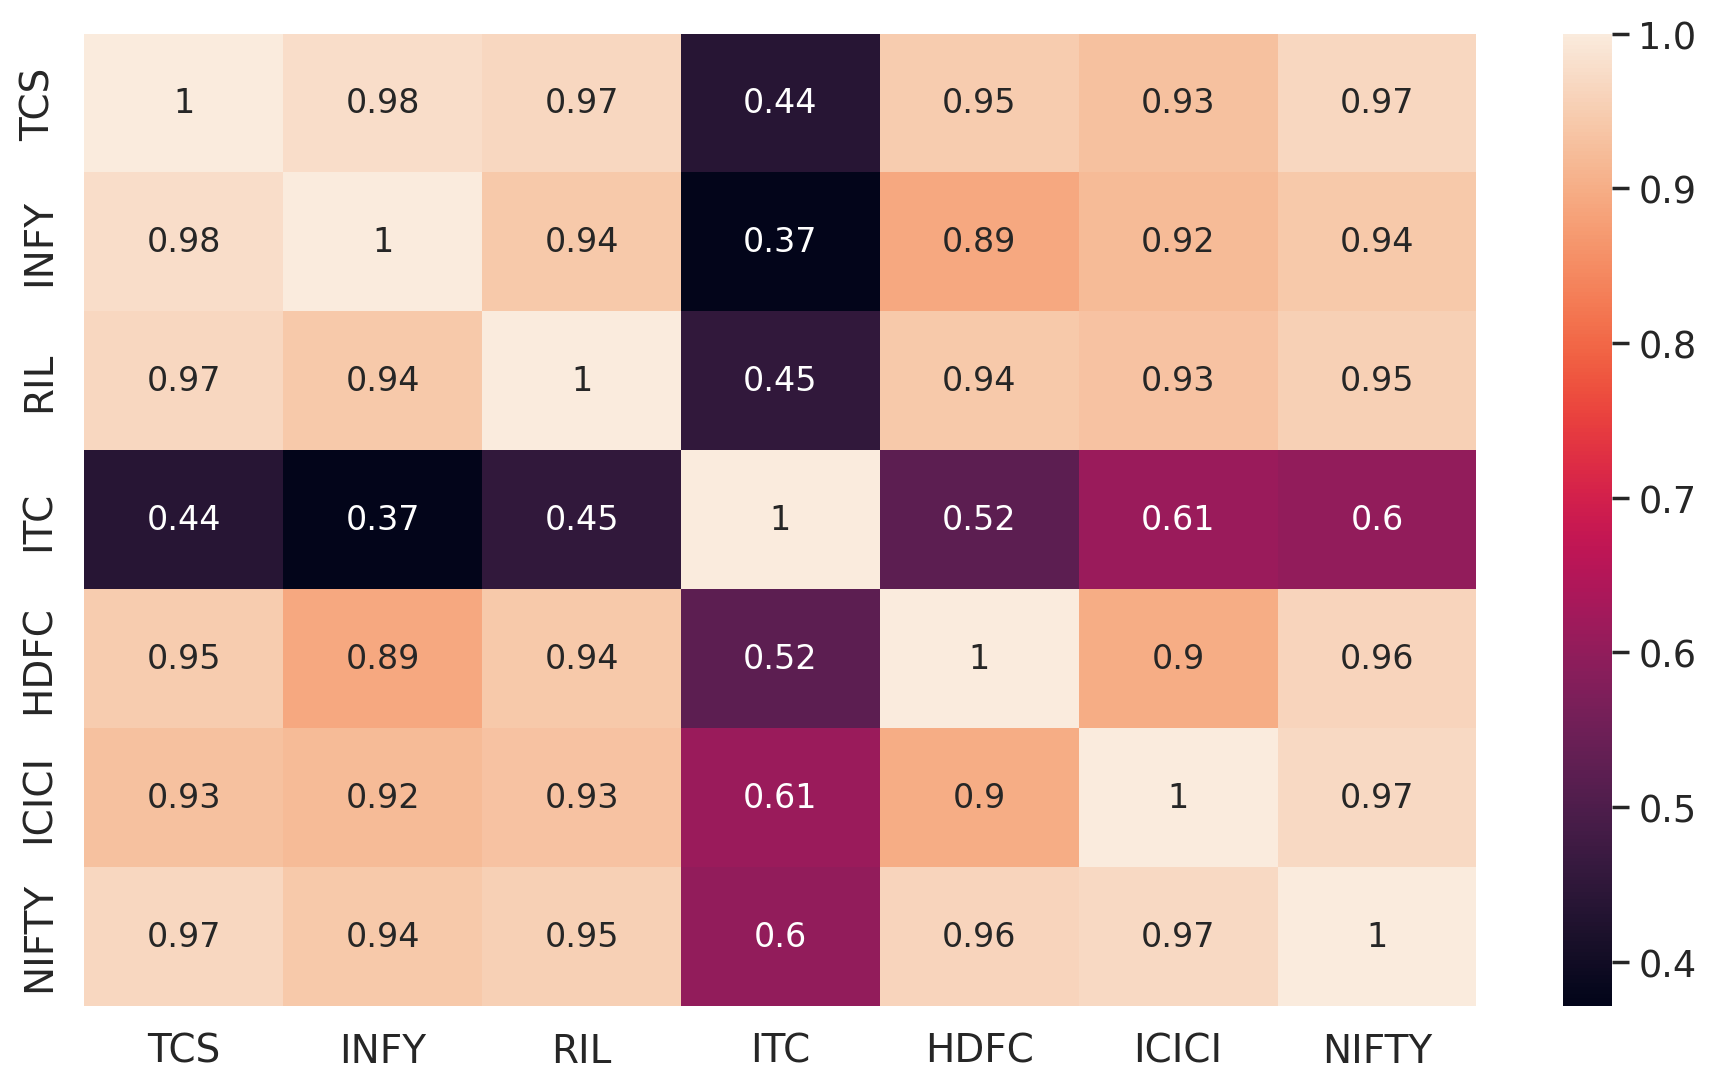

In [83]:
corr = dataset[['TCS','INFY','RIL','ITC','HDFC', 'ICICI', 'NIFTY']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

> The correlation map of daily prices reveals strong positive correlations between
- NIFTY50 -> TCS, INFY, RIL, HDFC and ICICI
- ICICI -> RIL and TCS
- HDFC -> TCS and RIL
- RIL -> TCS, INFY, HDFC and ICICI
- INFY -> TCS, RIL and ICICI
- TCS -> INFY, RIL, ICICI and HDFC
ITC has very weak corelation with all other stocks here. These correlations indicate a tendency for the stock prices of these companies to move in a similar direction, highlighting potential interdependencies and providing insights for portfolio diversification strategies.

### Correlation coefficients between companies' returns

The correlation coefficients between the returns of HDFC, ICICI, TCS, INFY, RIL, ITC and NIFTY50 provide a measure of the interdependence or independence of these companies' returns concerning the broader market, aiding investors in assessing the diversification potential and risk associated with including these stocks in their portfolios.

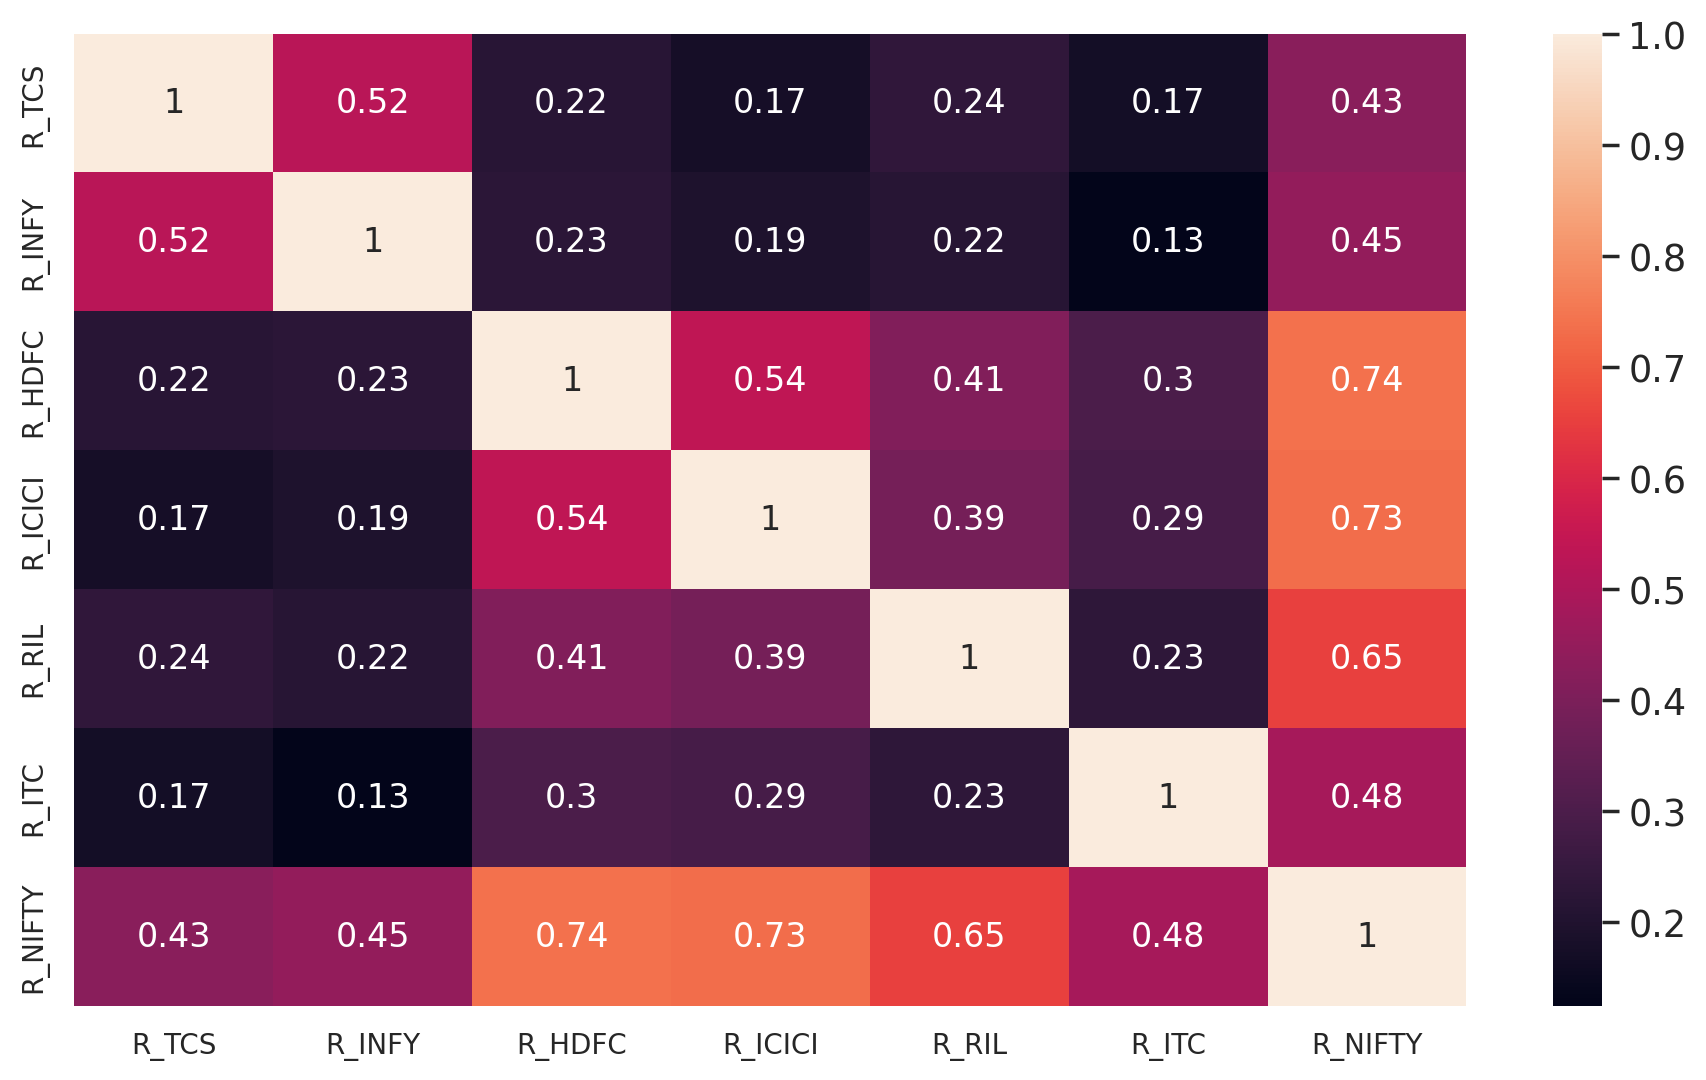

In [86]:
corr = dataset[['R_TCS', 'R_INFY', 'R_HDFC','R_ICICI','R_RIL','R_ITC', 'R_NIFTY']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt. show()

> The correlation map of returns prices demonstrates a strong positive correlation between the returns of the NIFTY50 and the returns of HDFC and ICICI. This indicates a tendency for the two to move in a similar direction, suggesting that overall market performance changes influence HDFC's and ICII's stock returns.

*  $$\mbox{Annualized Volatility} = \mbox{Daily Volatility}_i \times \sqrt{252}= \mbox{Returns}_i\times \sqrt{252},$$
$$\;\;\;\;i=\{\mbox{HDFC}, \mbox{ICICI}, \mbox{RIL}, \mbox{ITC}, \mbox{TCS}, \mbox{INFY}, \mbox{NIFTY} \}$$



*  $$\mbox{Monthly volatility} = \mbox{Daily Volatility}_i \times \sqrt{21}= \mbox{Returns}_i\times \sqrt{21},$$
$$\;\;\;\;i=\{\mbox{HDFC}, \mbox{ICICI}, \mbox{RIL}, \mbox{ITC}, \mbox{TCS}, \mbox{INFY}, \mbox{NIFTY} \}$$


**Note**: There are 252 trading days per year and 21 trading days per month. These are approximate numbers as number of trading days vary as per week alignment in every month.

In [87]:
returns  = dataset[['R_TCS', 'R_INFY', 'R_HDFC','R_ICICI','R_RIL','R_ITC', 'R_NIFTY']]
n_days = 252
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the stock of R_TCS = 24.06 % per year
The volatility of the stock of R_INFY = 27.65 % per year
The volatility of the stock of R_HDFC = 23.16 % per year
The volatility of the stock of R_ICICI = 32.4 % per year
The volatility of the stock of R_RIL = 27.7 % per year
The volatility of the stock of R_ITC = 25.53 % per year
The volatility of the stock of R_NIFTY = 16.6 % per year


We can see that the annual volatility of ICICI ($32.4\%$) is higthe highest amonth these stocks.

In [88]:
returns  = dataset[['R_TCS', 'R_INFY', 'R_HDFC','R_ICICI','R_RIL','R_ITC', 'R_NIFTY']]
n_days = 21
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the stock of R_TCS = 6.94 % per month
The volatility of the stock of R_INFY = 7.98 % per month
The volatility of the stock of R_HDFC = 6.69 % per month
The volatility of the stock of R_ICICI = 9.35 % per month
The volatility of the stock of R_RIL = 8.0 % per month
The volatility of the stock of R_ITC = 7.37 % per month
The volatility of the stock of R_NIFTY = 4.79 % per month


We can see that ICICI's monthly volatility ($9.35\%$) is still higher than other stocks.

> ICICI exhibits higher annual volatility ($32.4\%$) than the other stocks, indicating more significant price fluctuations and potential risk. Even every month, ICICI's volatility ($9.35\%$) remains higher than the other stocks, suggesting higher price swings.

## Sharpe ratio

The Sharpe ratio measures the risk-adjusted return for companies like top NIFTY companies like HDFC, ICICI, TC, RIL, INFY and ITC. By comparing their respective Sharpe ratios, we can assess the efficiency of each investment in generating returns relative to the level of risk. A higher Sharpe ratio indicates better risk-adjusted performance, implying that the acquisition provides higher returns for the risk taken. Analysing the Sharpe ratios of these companies and comparing them to the S&P 500 helps investors evaluate each investment option's relative attractiveness in balancing risk and return.

It is calculated by the formula below:

$$\mbox{Sharpe ratio}=\frac{R_p-R_f}{\sigma_p}$$

*  $R_p$ = Return of portfolio.

* $R_f$ = Risk-Free rate.

* $\sigma_p$ = Standard deviation of portfolio's excess return.


In [89]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf  ) / volatility
    return sharpe

In [90]:
# Let's consider a risk-free investment with an annual return of 2.5% and
#we calculate the Sharpe Ratio of each stock
for col in returns.columns:
    print("The Sharpe ratio of,", col,"=", round(sharpe_ratio(returns[col]),2 ))

The Sharpe ratio of, R_TCS = 0.68
The Sharpe ratio of, R_INFY = 0.56
The Sharpe ratio of, R_HDFC = 0.71
The Sharpe ratio of, R_ICICI = 0.6
The Sharpe ratio of, R_RIL = 0.7
The Sharpe ratio of, R_ITC = 0.39
The Sharpe ratio of, R_NIFTY = 0.69


**Interpretation of the Sharpe Ratio**

The Sharpe ratio gives the excess return of a stock (or a portfolio) per unit of risk.

* The Sharpe ratio of the NIFTY50 is equal to 0.69. Given a unit of risk, the NIFTY50 has an excess annual return of $69\%$ compared to a risk-free investment with an annual return of $6\%$ with FD.

*  For the same unit of risk, HDFC has an annual excess return of $71\%$ compared to a risk-free investment with an annual return of $6\%$ with FD. This means that HDFC has the potential to generate significantly higher returns relative to the risk-free investment compared to the NIFTY50.

Under these conditions, the best stock is HDFC because it has the highest Sharpe ratio.

> Based on these findings, it can be concluded that HDFC exhibits the highest Sharpe ratio among the stocks analysed. This indicates that, for a given level of risk, HDFC has the potential to provide the best risk-adjusted returns. Therefore, regarding the Sharpe ratio, HDFC is the most favourable stock choice among the options considered.

### Beta of a Security

Beta of the security measures how the given security performs in comparison to market, say NIFTY50 (if you are calculating US Stock. Generally, each country has some index which represent the market). Beta tells the following,

* $\beta = 0$ No relation to the market (i.e NIFTY50).

* $\beta = 1$ Performs same as the market.

* $\beta<1$ Lose less in recession and makes less in flourishing economy.

* $\beta>1$  Lose more in recession and makes more in flourinshing economy.

* $\beta<0$  Negatively related to market. That is, if market goes up, security (used interchangeably with stock) goes down and vice versa. Eg. GOLD, SILVER, precious metal etc.

Can be calculated as follows:

$$\beta=\frac{\mbox{Cov}(\mbox{Stock}_i, NIFTY)}{\mbox{Var}(NIFTY)}$$

Where, $i=\mbox{HDFC}, \mbox{ICICI}, \mbox{TCS}, \mbox{INFY}, \mbox{RIL}, \mbox{ITC}$



In [92]:
cov = returns.cov() * 12 # annualized
cov
#'R_TCS', 'R_INFY', 'R_HDFC','R_ICICI','R_RIL','R_ITC', 'R_NIFTY

R_TCS    R_INFY    R_HDFC   R_ICICI     R_RIL     R_ITC   R_NIFTY
R_TCS    0.002756  0.001653  0.000586  0.000646  0.000753  0.000506  0.000816
R_INFY   0.001653  0.003642  0.000692  0.000831  0.000788  0.000421  0.000978
R_HDFC   0.000586  0.000692  0.002554  0.001920  0.001257  0.000840  0.001352
R_ICICI  0.000646  0.000831  0.001920  0.004997  0.001653  0.001129  0.001873
R_RIL    0.000753  0.000788  0.001257  0.001653  0.003654  0.000781  0.001432
R_ITC    0.000506  0.000421  0.000840  0.001129  0.000781  0.003103  0.000977
R_NIFTY  0.000816  0.000978  0.001352  0.001873  0.001432  0.000977  0.001312

In [97]:
def calculate_beta(cov_data, stock_list):
    beta = {}
    for stock in stock_list:
        beta[stock] = cov_data.loc[stock, 'R_NIFTY'] / cov_data.loc['R_NIFTY', 'R_NIFTY']
        print(f'Beta of {stock} is : {beta[stock]}')

    return beta

Beta (10Y period) of TCS is : 0.6215451521118586


In [98]:
calculate_beta(cov, ['R_TCS', 'R_INFY', 'R_HDFC','R_ICICI','R_RIL','R_ITC'])

Beta of R_TCS is : 0.6215451521118586
Beta of R_INFY is : 0.7452982816431177
Beta of R_HDFC is : 1.0300390054362734
Beta of R_ICICI is : 1.4272803733208033
Beta of R_RIL is : 1.0912588229466638
Beta of R_ITC is : 0.7442481189324992


{'R_TCS': 0.6215451521118586,
 'R_INFY': 0.7452982816431177,
 'R_HDFC': 1.0300390054362734,
 'R_ICICI': 1.4272803733208033,
 'R_RIL': 1.0912588229466638,
 'R_ITC': 0.7442481189324992}

## Portfolio Simulation

> In this Project, we will perform a portfolio simulation for TCS, INFY, HDFC, ICICI, RIL, ITC and NIFTY market index. We are using Python's Scipy.optimize Package. We will generate 2805 portfolios by adjusting the asset allocation. The simulation considers historical returns, volatilities, and correlations to construct efficient portfolios. With a risk-free rate of $0\%$, we will evaluate the portfolios' performance relative to a risk-free investment. The analysis aims to understand diversification benefits and risk reduction, providing insights for constructing well-diversified portfolios aligned with investors' risk tolerance and return objectives.

In [100]:
from scipy.optimize import minimize

In [101]:
# Portfolio Simulation
portfolio        = 2805  # generation of a portfolio
n_assets         = returns.shape[1]
weights          = np.random.dirichlet(np.full(n_assets,0.05),portfolio)
mean_returns     = returns.mean()
sigma            = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol     = np.zeros(portfolio)
sharpe_ratio     = np.zeros(portfolio)
rf_rate          = 0.0                          # risk free rate

for i in range(portfolio):
    w                   = weights[i,:]
    expected_returns[i] = np.sum(mean_returns @ w)*252
    expected_vol[i]     = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
    sharpe_ratio[i]     = (expected_returns[i]-rf_rate)/expected_vol[i]

In [102]:
def portfolio_volatility(weight):
    return np.sqrt(np.dot(weight.T,
                          np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):

    return np.sum(mean_returns*weight)*252

def portfolio_performance(weight):
    return_p = portfolio_return(weight)
    vol_p    = portfolio_volatility(weight)
    return return_p, vol_p

In [103]:
def negativeSR(weight):
    return_p, vol_p = portfolio_performance(weight)
    rf_rate         = 0.025
    return -(return_p - rf_rate)/vol_p

def max_sharpe_ratio():

    def sum_one(weight):
        w= weight
        return np.sum(weight)-1

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': sum_one})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()    # w0 is an initila guess

    return minimize(negativeSR,w0,method='SLSQP',
                          bounds  =((0,1),)*n_assets,
                      constraints = weight_constraints)

In [104]:
def min_vol():

    n_assets           = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    w0                 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds             = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0,method='SLSQP',
                   bounds      = bounds,
                   constraints = weight_constraints)

In [105]:
def efficient_portfolio_target(target):

    constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)- target},
                  {'type' :'eq','fun': lambda x: np.sum(x)-1})
    w0          = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds      = ((0,1),)*n_assets

    return minimize(portfolio_volatility,w0, method = 'SLSQP',
                    bounds      = bounds,
                    constraints = constraints)

In [106]:
def efficient_frontier(return_range):
    return [efficient_portfolio_target(ret) for ret in return_range]

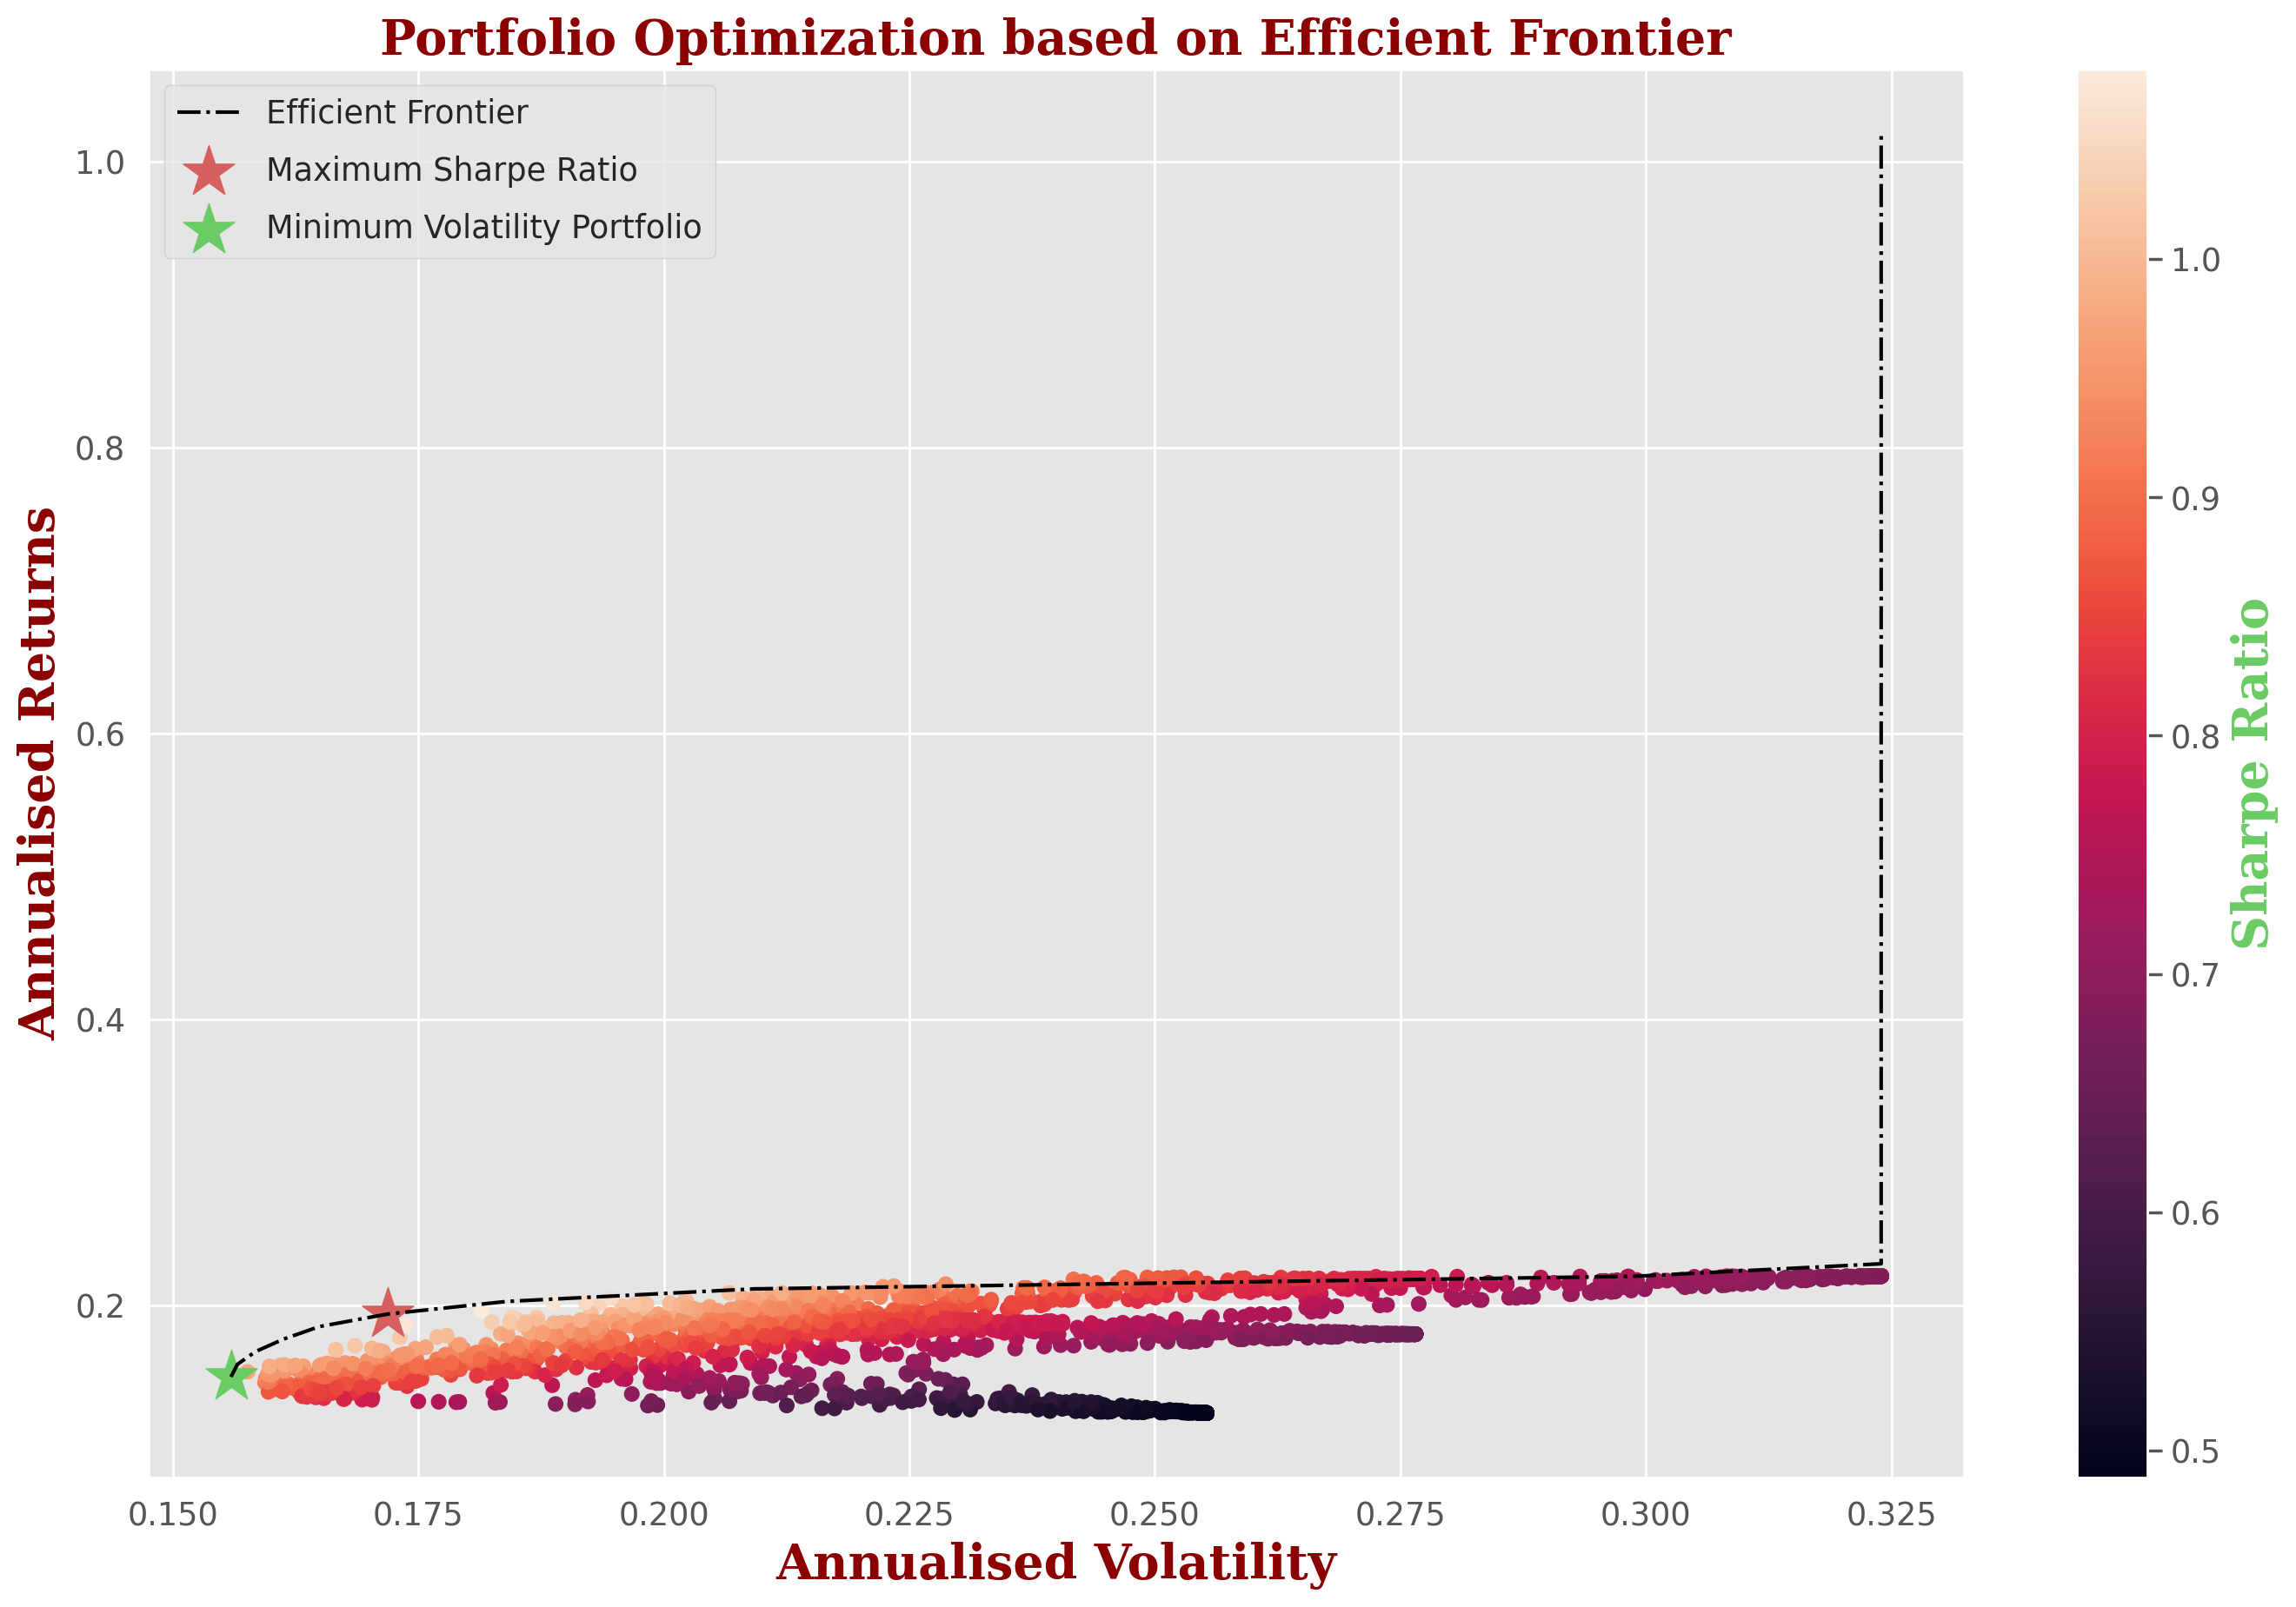

In [107]:
sharpe_maximum      = max_sharpe_ratio()
return_p,vol_p      = portfolio_performance(sharpe_maximum['x'])
min_volatility      = min_vol()
return_min,vol_min  = portfolio_performance(min_volatility['x'])


plt.figure(figsize =(15,10))
plt.style.use('ggplot')
plt.scatter(expected_vol,expected_returns, c = sharpe_ratio)
# plt.colorbar.sel(label = 'Sharpe Ratio',size=20)
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle ='dashdot', color ='black',
         label='Efficient Frontier')
plt.scatter(vol_p,return_p, c = 'r', marker='*', s = 500, label = 'Maximum Sharpe Ratio')
plt.scatter(vol_min,return_min, c = 'g',  marker ='*', s = 500, label='Minimum Volatility Portfolio')

font1 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
font2 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
plt.title('Portfolio Optimization based on Efficient Frontier',fontdict=font1)
plt.xlabel('Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
plt.legend(labelspacing=0.8)

## Random portfolio simulation

Now we will move on to the crucial step of portfolio optimization: simulating a random portfolio using a Dirichlet distribution with weight limits. So we will try to generate 10,000 portfolios with a risk-free rate of $6\%$. To do this, we need to compute performance measures for each portfolio, such as the weighted average return during the year and the standard deviation and Sharpe ratio of each portfolio.

### Basic formulas for calculating the necessary functions

In [108]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):# portfolio performance, calculate the annualised return, sharpe ratio
    portfolio_return = np.sum(mean_returns*weights)*252 #252 working days at the stock exchange
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))*np.sqrt(252) # np.dot multiplication of matrices
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf): # random simulation
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights=np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]
    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
    return results_df

In [114]:
tickers = []
for i in dataset[['TCS','INFY','RIL','ITC','HDFC', 'ICICI']].columns:
    tickers.append(i)

In [115]:
mean_returns = dataset[['TCS','INFY','RIL','ITC','HDFC', 'ICICI']].pct_change().mean()
cov = dataset[['TCS','INFY','RIL','ITC','HDFC', 'ICICI']].pct_change().cov()
num_portfolios = 10000
rf = 0.06
results_frame =simulate_random_portfolios(num_portfolios, mean_returns,cov, rf) #random selection/creation of the portfolio

In [116]:
results_frame.sum(axis=1)-results_frame["ret"]-results_frame["stdev"]-results_frame["sharpe"];

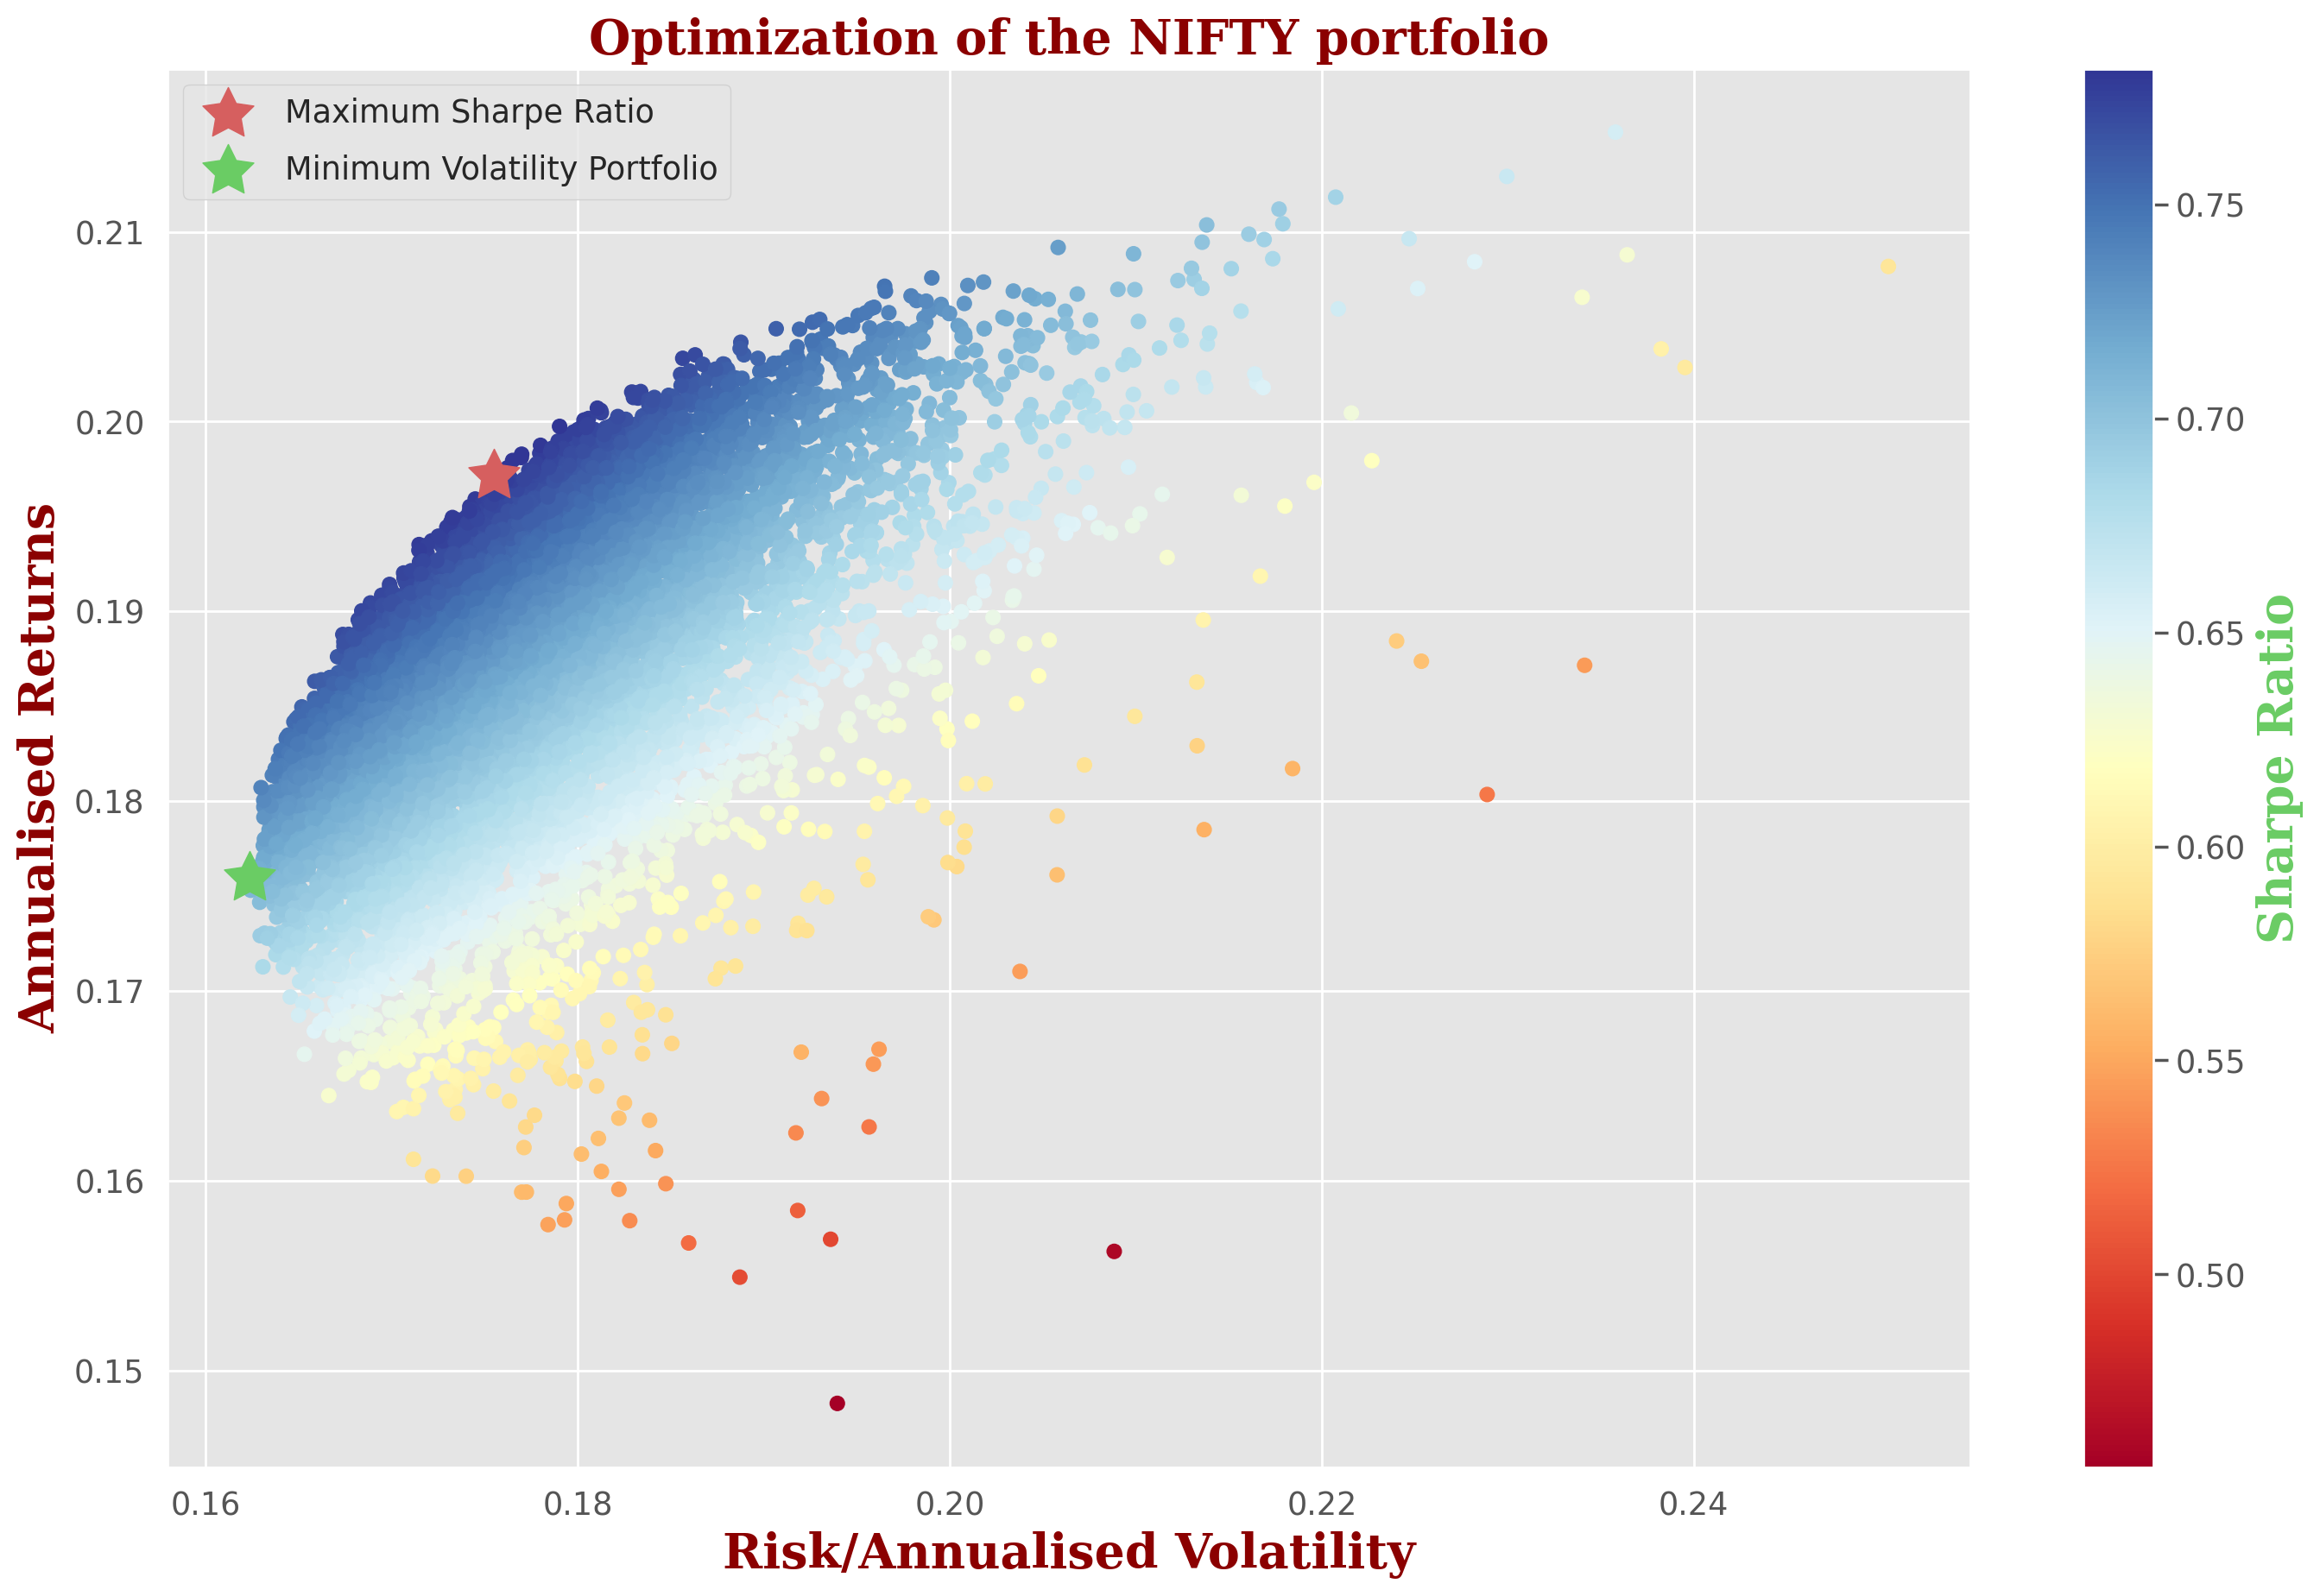

In [117]:
#Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port=results_frame.iloc[results_frame["sharpe"].idxmax()] # max sharp ratio rouge
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame["stdev"].idxmin()] # min volatility = min variance portfolio vert
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10)) # Number of rows/colums of the subplot grid
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu') #Colormaps in Matplotlib
plt.title('Optimization of the NIFTY portfolio',fontdict=font1)
plt.xlabel('Risk/Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
#plt.colorbar () # match the colorbar
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target               = np.linspace(return_min,1.02,100)
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500, label = 'Maximum Sharpe Ratio')
#plot green star to highlight position of minimum vartance portfolio
plt.scatter(min_vol_port[1] ,min_vol_port[0],marker=(5,1,0),color='g', s=500, label='Minimum Volatility Portfolio')
plt.legend(labelspacing=0.8)
plt.savefig('Portfolio_Optimization_Efficient_Frontier.pdf')
plt.show()

> Now, let's turn to the weights of the assets in the NIFTY portfolios.

In [118]:
max_sharpe_port.to_frame().T # portfolio with the highest Sharpe ratio.

ret     stdev    sharpe       TCS      INFY       RIL       ITC  \
297  0.197163  0.175476  0.781661  0.280685  0.090272  0.236622  0.012374   

         HDFC     ICICI  
297  0.282955  0.097092

In [119]:
min_vol_port.to_frame().T #portfolio with the Lowest variance portfolio

ret     stdev   sharpe       TCS      INFY       RIL       ITC  \
5610  0.175934  0.162354  0.71408  0.256163  0.134013  0.103224  0.229133   

          HDFC     ICICI  
5610  0.274438  0.003029

> Looking at the table of weights in a portfolio with the highest Sharpe ratio, we can see that HDFC has a higher weight than the other companies. In comparison, ICICI has the lowest weight in a minimum variance portfolio. We can conclude that the better portfolio among these two weights is the one with high risk. If we consider the risk-adjusted return, this portfolio gave the highest Sharpe ratio ($19.71\%$) compared to the minimum variance portfolio, which means that it is the one for which the investor will receive the highest excess return for the additional risk he will take.

## Conclusion

> In conclusion, the analysis of the stock market data for companies such as TCS, INFY, HDFC, ICICI, RIL, ITC and the NIFTY50 has provided valuable insights.

* **Volatility**: The examination of annual and monthly volatilities revealed that ICICI exhibited the highest volatility among the stocks, indicating greater price fluctuations and potential risk. This information can assist investors in understanding the risk profiles of these stocks and making informed investment decisions.

* **Correlation**: The correlation analysis indicated strong positive correlations between

NIFTY50 -> TCS, INFY, RIL, HDFC and ICICI

ICICI -> RIL and TCS

HDFC -> TCS and RIL

RIL -> TCS, INFY, HDFC and ICICI

INFY -> TCS, RIL and ICICI

TCS -> INFY, RIL, ICICI and HDFC

whereas ITC shoes weak correlation with all remaining stoks. These correlations suggest potential interdependencies and can guide portfolio diversification strategies.

* **Risk-Adjusted Returns**: The evaluation of the Sharpe ratios offered insights into the risk-adjusted performance of the stocks. HDFC emerged as the stock with the highest Sharpe ratio, indicating the potential for generating better risk-adjusted returns compared to the other stocks and the risk-free investment.

> Overall, these findings highlight the importance of considering factors such as volatility, correlation, and risk-adjusted returns when analyzing and selecting stocks for investment purposes. By taking into account these key metrics, investors can make more informed decisions, manage risk effectively, and potentially optimize their investment portfolios.